## Note: Since the whole process is complex and the code has not been totally cleaned, it is advised to refer the Thesis in which all the steps have been explained in detail

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer, roc_curve, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from datetime import datetime

from IPython.display import display
pd.options.display.max_columns = 60

import math
#math.isnan(math.nan)

os.getcwd()

'C:\\Users\\feder\\Desktop\\Enel\\Models&Datasets_final'

In [2]:
def title_ticks_ecc(title, xlabel, ylabel, new_fig= True , figsize= (10,6)):
    if new_fig== True:
        plt.figure(figsize=figsize)
        
    plt.title(title, color='red', fontsize= 18, pad= 13)
    plt.xlabel(xlabel, color='red', fontsize= 14)
    plt.ylabel(ylabel, color='red', fontsize= 14)
    plt.xticks(fontsize=12, color='blue')
    plt.yticks(fontsize=12, color='blue')

###### Importing Raw Data

In [3]:
df_original= pd.read_pickle('../../dati_enel_v3/df_concatenated.pk1')
df_original.head(2)

,Purchase document,Migrated Flag,Completely migrated flag,Created by migration flag,Validity start date,Validity end date,Global Business line,Contract,Purchase document type,Job type,Document date,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag
0,CR\0020134304,N,N,N,2013/12/11 00:00:00,9999/12/31 00:00:00,M&S,CR\8400060274,QZ,S,2013/12/11 00:00:00,nd,nd,N,3000,SPTD05,N,2733,Y,S,Centro,IT,nd,nd,nd,N,N
1,CR\0020134497,N,N,N,2013/12/20 00:00:00,9999/12/31 00:00:00,M&S,CR\8400060274,QZ,S,2013/12/20 00:00:00,nd,nd,N,12918,SPTD05,N,2733,Y,S,Centro,IT,nd,nd,nd,N,N


**Converting Header Amount to Float**

In [124]:
df_original['Header amount']= df_original['Header amount'].apply(lambda x: float(x.replace(',', '.')) if ',' in x else float(x)) 

##### piccola parentesi di pulizia dataset (correzione anno data da 0215 a 2015)

In [126]:
df_original[df_original['Purchase document']== 'EL\\5700010034']

,Purchase document,Migrated Flag,Completely migrated flag,Created by migration flag,Validity start date,Validity end date,Global Business line,Contract,Purchase document type,Job type,Document date,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag
1933492,EL\5700010034,N,N,N,0215/01/01 00:00:00,2017/12/31 00:00:00,M&S,nd,Z,F,2014/12/29 00:00:00,0000000000,PER,Y,1410658.31,FEMI04,N,108112,N,S,Estero,PE,PEM,PE,nd,N,N


In [ ]:
#### Changing the wrong date from 0215 to 2015
df_original.set_value(1933492, 'Validity start date', '2015/01/01 00:00:00')

In [129]:
df_original.shape  #5680670 rows

(5680670, 27)

In [130]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5680670 entries, 0 to 1524188
Data columns (total 27 columns):
Purchase document                         object
Migrated Flag                             object
Completely migrated flag                  object
Created by migration flag                 object
Validity start date                       object
Validity end date                         object
Global Business line                      object
Contract                                  object
Purchase document type                    object
Job type                                  object
Document date                             object
Variant code                              object
Global Purchase Unit Code                 object
Contract Type                             object
Header amount                             float64
QMG Code                                  object
Active contract flag                      object
VMD Code                                  object
Main

In [131]:
df_original.iloc[:,15:27].describe()

,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag
count,5680670,5680670,5680670,5680670,5680670,5680670,5680670,5680670,5680670,5680670,5680670,5680670
unique,1288,2,43698,2,6,6,84,91,16,925,2,2
top,LELE05,N,24056,N,S,Estero,ES,nd,nd,nd,N,N
freq,2458467,5540588,217195,4411956,4430806,3979658,2279956,3021940,3022069,5280006,5200932,5678451


In [132]:
## Checking if there are missing values                
df_original.isnull().sum().sort_values(ascending=False).head()

Purchase document            0
Migrated Flag                0
Completely migrated flag     0
Created by migration flag    0
Validity start date          0
dtype: int64

In [133]:
### Checking degree of sparsity: how many zeros there are in the dataset

from numpy import count_nonzero
print("DEGREE OF SPARSITY OF MATRIX: ", (1.0 - count_nonzero(df_original) / df_original.size).round(10) * 100, '%')

DEGREE OF SPARSITY OF MATRIX:  0.0024984 %


### FILTERING DATASET ACCORDING TO SPECIFIC BUSINESS CONSTRAINTS

In [135]:
df_original[df_original['Purchase document type'].isin(['Q','QD'])]['Contract Type'].value_counts() #sono tutti ordini

N    1326
Name: Contract Type, dtype: int64

In [136]:
len(df_original[df_original['Header amount']<=0])

3867

In [137]:
# Tolgo Contratti con Purchase Type Q o QD

df_original_filtered= df_original[df_original['Header amount']>0]
df_original_filtered= df_original_filtered[df_original_filtered['Purchase document type'].isin(['Q','QD'])==False]

del df_original # to free memory
df_original_filtered.shape

(5675608, 27)

In [139]:
len(df_original_filtered[(df_original_filtered['Contract Type']== 'Y') & (df_original_filtered[
    'Purchase document type'].isin(['Z','A', 'V'])==False)])

86839

In [140]:
## Tolgo Contratti (quindi Contract Type== Y) che hanno Purchase Type diverso da Z, A o V

idx_da_scartare= df_original_filtered[(df_original_filtered['Contract Type']== 'Y') & (df_original_filtered[
'Purchase document type'].isin(['Z','A', 'V'])==False)].index

df_original_filtered.drop(idx_da_scartare, inplace= True)


df_original_filtered.shape   

(5451727, 27)

## <center> First Descriptive Analysis on the not aggregated dataset </font>   

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000.]), <a list of 8 Text yticklabel objects>)

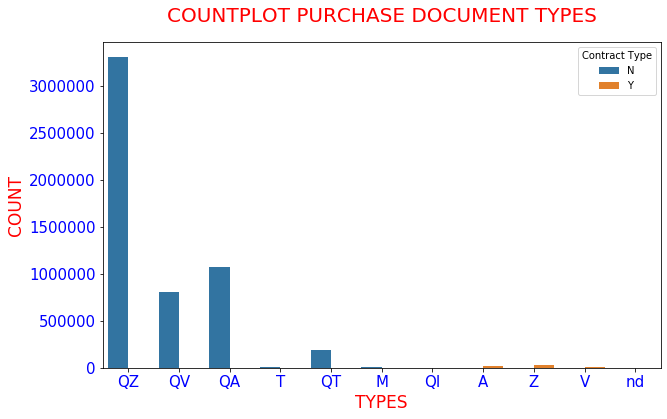

In [142]:
plt.figure(figsize=(10,6))  
plt.title('COUNTPLOT PURCHASE DOCUMENT TYPES', fontsize=20, color= 'r', pad=20)
sns.countplot(data= df_original_filtered, x='Purchase document type', hue= 'Contract Type' ) #order=df_faculty['PhdDecade'].value_counts().index 
plt.xlabel('TYPES', color='r', fontsize= 17)
plt.ylabel('COUNT', color='r', fontsize= 17)
plt.xticks(color= 'blue', fontsize=15)
plt.yticks(color= 'blue', fontsize=15)

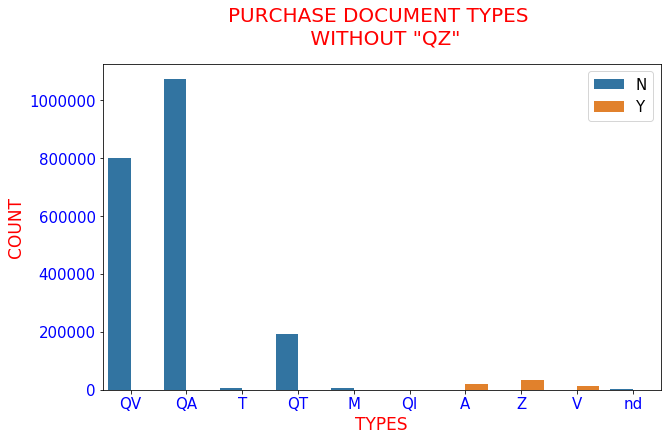

In [143]:
plt.figure(figsize=(10,6))
plt.title('PURCHASE DOCUMENT TYPES \n WITHOUT "QZ"', fontsize=20, color= 'r', pad=20)
sns.countplot(data= df_original_filtered[df_original_filtered['Purchase document type'] != 'QZ'], x='Purchase document type', hue= 'Contract Type' )  
plt.xlabel('TYPES', color='r', fontsize= 17)
plt.ylabel('COUNT', color='r', fontsize= 17)
plt.xticks(color= 'blue', fontsize=15)
plt.yticks(color= 'blue', fontsize=15)
plt.legend(fontsize=15)

In [145]:
tutti_contratti= df_original_filtered[(df_original_filtered['Contract Type']=='Y') | 
                    (df_original_filtered['Purchase document type']=='T')]
tutti_contratti.shape #(73284, 27), 73K contratti per ora

(73284, 27)

In [147]:
### In this specific dataset the NaNs are marked as 'nd'

nd= {}
for col in tutti_contratti.select_dtypes(include=object).columns:
    try:
        nd[col]= tutti_contratti.select_dtypes(include=object)[col].value_counts().loc['nd']
    except:
        nd[col]= 0
        pass
nd

{'Purchase document': 0,
 'Migrated Flag': 0,
 'Completely migrated flag': 0,
 'Created by migration flag': 0,
 'Validity start date': 0,
 'Validity end date': 0,
 'Global Business line': 154,
 'Contract': 65311,
 'Purchase document type': 0,
 'Job type': 10,
 'Document date': 0,
 'Variant code': 31420,
 'Global Purchase Unit Code': 0,
 'Contract Type': 0,
 'QMG Code': 1684,
 'Active contract flag': 0,
 'VMD Code': 0,
 'Main material group qualification flag': 0,
 'Supplier Type Code': 0,
 'Geographical Area': 809,
 'Country Code': 721,
 'Purchase Unit Code': 0,
 'Purchase Country Code': 0,
 'Main Requesting unit': 51666,
 'Professional services flag': 0,
 'Energy convey flag': 0}

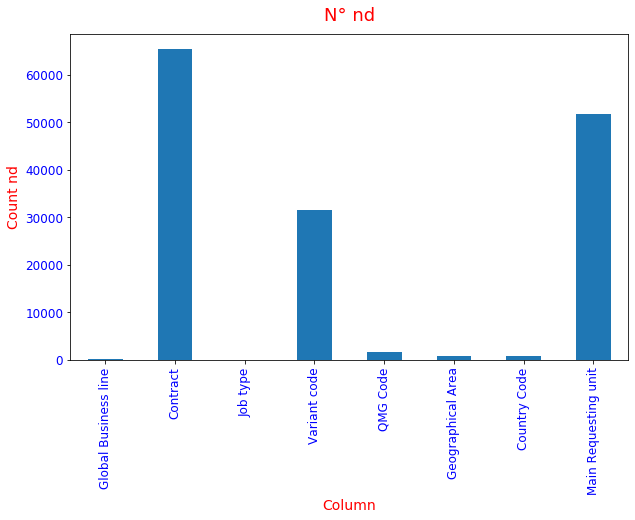

In [148]:
title_ticks_ecc('N° nd', 'Column', 'Count nd')
pd.Series(nd)[pd.Series(nd)>0].plot(kind='bar')

In [150]:
### Cardinality (total number of different categories per each categorical variable)

cardinalita= {}
for col in tutti_contratti.select_dtypes(include=object).columns:
    cardinalita[col]= tutti_contratti.select_dtypes(include=object)[col].nunique()
cardinalita= pd.Series(cardinalita)
cardinalita= cardinalita.sort_values(ascending=False)
#d= d.drop('life%')
cardinalita= pd.DataFrame(cardinalita, columns= ['cardinalità_classe'])
cardinalita.head(10)

,cardinalità_classe
Purchase document,73284
VMD Code,18519
Validity end date,3664
Validity start date,2743
Document date,2289
Contract,1833
QMG Code,949
Main Requesting unit,726
Purchase Unit Code,78
Country Code,70


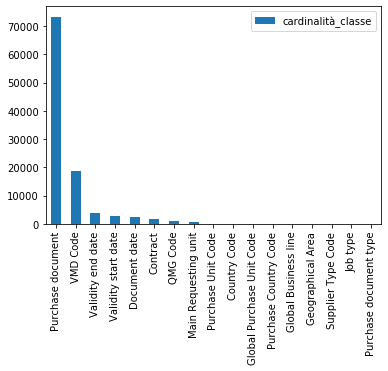

In [151]:
cardinalita[cardinalita['cardinalità_classe']>2].plot(kind='bar')

**Lavoro sugli ordini che sono di tipo T, che sono in realtà contratti**

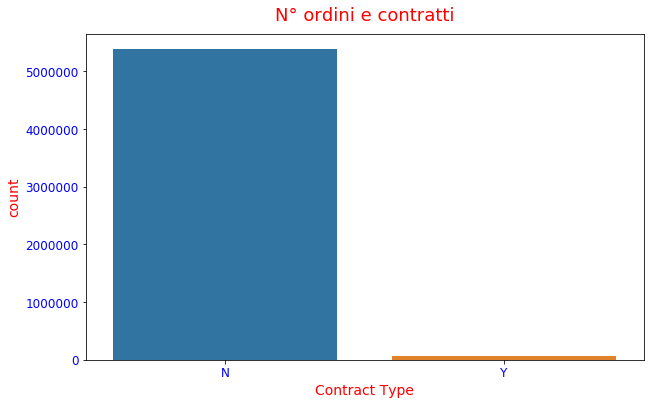

In [153]:
title_ticks_ecc('N° ordini e contratti', 'Is Contract', 'Count')
sns.countplot(df_original_filtered['Contract Type'])

Text(0.5, 0, 'Is Active')

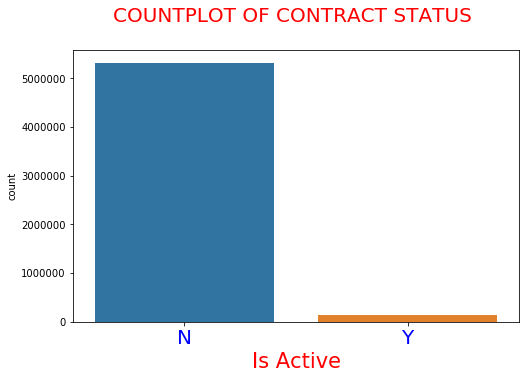

In [154]:
plt.figure(figsize= (8,5))
plt.title('COUNTPLOT OF CONTRACT STATUS \n', fontsize=20, color='red')
sns.countplot(df_original_filtered['Active contract flag'])
plt.xticks(color= 'blue', fontsize=20)
plt.xlabel('Is Active', color='r', fontsize= 21)

In [155]:
df_original_filtered['Energy convey flag'].value_counts()

N    5449560
Y       2167
Name: Energy convey flag, dtype: int64

In [157]:
contractID = df_original_filtered['Contract']
contractID.describe()   ##n° ordini 5451727, unici 115011. #sarebbero ordini. Siccome ho ca. 73K contratti, ordini rimanenti sono spaiati

count     5451727
unique     115011
top            nd
freq       137836
Name: Contract, dtype: object

In [158]:
### Purchase document is a Primary Key, it is the ID of the contract

documentID= df_original_filtered['Purchase document']
documentID.value_counts()[documentID.value_counts().values>1]  #check ok

Series([], Name: Purchase document, dtype: int64)

In [161]:
### Merging datasets

match_contrID_docID= pd.merge(pd.DataFrame(contractID.unique()), pd.DataFrame(documentID.values), how= 'inner')
len(match_contrID_docID), len(match_contrID_docID.squeeze().unique())  #59078 con nuovo filtro

(59078, 59078)

 # <center> Creating new features to summarize information over time

## First, I must associate orders to contracts with the join and aggregated functions

In [162]:
from datetime import datetime
## Trial
dt1 = datetime.strptime('2012/03/19 11:46:51', '%Y/%m/%d %H:%M:%S')  #%H:%M:%S  hourse minutes and seconds
diff= dt1- datetime.strptime('2011/03/18 11:46:50', '%Y/%m/%d %H:%M:%S')
diff.days

367

In [165]:
df_filtered= df_original_filtered.copy()
df_filtered.head(2)

,Purchase document,Migrated Flag,Completely migrated flag,Created by migration flag,Validity start date,Validity end date,Global Business line,Contract,Purchase document type,Job type,Document date,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag
0,CR\0020134304,N,N,N,2013/12/11 00:00:00,9999/12/31 00:00:00,M&S,CR\8400060274,QZ,S,2013/12/11 00:00:00,nd,nd,N,3000.0,SPTD05,N,2733,Y,S,Centro,IT,nd,nd,nd,N,N
1,CR\0020134497,N,N,N,2013/12/20 00:00:00,9999/12/31 00:00:00,M&S,CR\8400060274,QZ,S,2013/12/20 00:00:00,nd,nd,N,12918.0,SPTD05,N,2733,Y,S,Centro,IT,nd,nd,nd,N,N


In [166]:
#df_filtered['Validity start date']= df_filtered['Validity start date'].astype(str)

df_filtered['Validity start date']= df_filtered['Validity start date'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d %H:%M:%S'))
df_filtered['Validity end date']= df_filtered['Validity end date'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d %H:%M:%S'))
df_filtered['Document date']= df_filtered['Document date'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d %H:%M:%S'))

del df_original_filtered

In [172]:
#df_original_filtered['Document date']= df_original_filtered['Document date'].dt.date
df_filtered.drop(['Migrated Flag', 'Created by migration flag', 'Completely migrated flag'], axis=1, inplace=True)

df_filtered.tail(2)

,Purchase document,Validity start date,Validity end date,Global Business line,Contract,Purchase document type,Job type,Document date,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag
1524185,S4\8400122470,2018-04-01 00:00:00,2019-02-28 00:00:00,GES,nd,A,S,2018-03-15,0000000000,IBE,Y,10155.00,SPCL03,N,78320,Y,S,Estero,ES,IBS,ES,ES21-06,N,N
1524188,G4\8400117426,2017-11-21 00:00:00,2018-05-21 00:00:00,GRE,nd,A,F,2017-11-21,0000000000,COL,Y,123894.58,FMMM05,N,147517,N,S,Estero,CO,COR,CO,L_H_BRB,N,N


### Creating several subsets: only orders, only contracts, only those with type T etcetera

In [176]:
tutti_ordini = df_filtered[df_filtered['Contract Type'] == 'N']  #sono tutti ordini
ordini_non_T= df_filtered[(df_filtered['Contract Type'] == 'N') & (df_filtered['Purchase document type'] != 'T')]

contrattiT= df_filtered[df_filtered['Purchase document type'] == 'T'] #sarebbero anche ordini T
contratti_non_T= df_filtered[df_filtered['Contract Type'] == 'Y'] #tutti i contratti 'classici'
len(contrattiT)  #7928

7928

In [177]:
tutti_contratti= pd.concat([contratti_non_T, contrattiT])
len(tutti_contratti)   #sono 73284

73284

 ### Left join between contracts and orders: Purchase document will be only related to contracts

In [ ]:
join_finale= tutti_contratti.merge(tutti_ordini, left_on= 'Purchase document', right_on= 'Contract', how='left', suffixes=('_contr', '_ordine'))
join_finale.shape  #2184575 righe

In [ ]:
# la chiamo join_duplicates per motivi vecchi, adesso è pulita, non ci sono duplicati
join_duplicates= join_finale[list(join_finale.columns[:24])+['Purchase document_ordine','Contract_ordine','Header amount_ordine', 'Document date_ordine']]
join_duplicates.columns= list(df_filtered.columns)+ ['Purchase document_ordine','Contract_ordine','Header amount_ordine', 'Document date_ordine']
join_duplicates.shape, join_duplicates.drop_duplicates().shape  #2184575, non ci sono duplicati, check ok V

In [ ]:
detective_T= join_duplicates.loc[(join_duplicates['Purchase document type']== 'T') ][['Purchase document', 'Purchase document_ordine', 'Header amount', 'Header amount_ordine']]
detective_T[detective_T['Header amount_ordine'] > detective_T['Header amount']].loc[[2014795,2014797 ]]

In [ ]:
join_duplicates[(join_duplicates['Header amount'] == 284.91) & (join_duplicates['Header amount_ordine'].isin([285.19, 286.63]))][['Purchase document', 'Purchase document_ordine','Header amount', 'Header amount_ordine']]
#del join_finale, join_duplicates

In [ ]:
contratti_senza_ordini= join_duplicates[join_duplicates[['Purchase document_ordine', 
                       'Contract_ordine','Header amount_ordine', 'Document date_ordine']].isna().all(axis=1)]

len(contratti_senza_ordini), len(contratti_senza_ordini['Purchase document'].unique()) #14206 senza ordini, tutti unici

In [ ]:
contratti_con_ordini= join_duplicates.drop(contratti_senza_ordini.index)
contratti_con_ordini.shape,  len(contratti_con_ordini['Purchase document'].unique())   # con ordini unique sono 59078

### TRASFORMING FIELDS WITH DATE IN DATETIME OBJECTS

In [95]:
join_duplicates['Document date_ordine']= join_duplicates['Document date_ordine'].apply(
    lambda x: datetime.strptime(x, '%Y/%m/%d %H:%M:%S') if (type(x)== str) else x)

# Checkpoint0: I create a new dataset with temporal range of contract duration, splitted into N time bins

In [12]:
snapshots= np.arange(0.,0.91, 0.1)
snapshots

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [6]:
join_date_fasce= join_duplicates.copy()

del join_duplicates
join_date_fasce.shape   #(2184575, 28)  

(2184575, 28)

In [3]:
def date_between(start_date, end_date, percentage_middle_desidered):
    return start_date + (end_date - start_date)*percentage_middle_desidered

In [9]:
print(date_between(join_date_fasce.iloc[0]['Validity start date'], join_date_fasce.iloc[0]['Validity end date'], 0.25)) #giusto
print(list(np.linspace(0, 1 , 5))[1:-1])

2019-09-08 06:00:00
[0.25, 0.5, 0.75]


In [4]:
def crea_fasce_temporali(dataframe, start_date_col, end_date_col, n_fasce, arange= True, list_arange= np.arange(0.1,0.91, 0.2)):
    #"""Metterne 2 in piu di quelle che voglio"""
    percentages= list(np.linspace(0, 1 , n_fasce))[1:-1]  #tolgo estremi, che coinciderebbero con start e end dates
    percentages= [round(per,2) for per in percentages]
    end_point_ciclo_for= n_fasce-2
    
    if arange== True:
        percentages= [round(per,2) for per in list_arange]
        end_point_ciclo_for= len(percentages)
    
    labels= [str(per)+'%life' for per in percentages]
    
    for i in range(end_point_ciclo_for):  #meno gli estremi, 0 e 1, cioè start date e end date
        dataframe[labels[i]]= dataframe.apply(lambda row: date_between(
                                                row[start_date_col],row[end_date_col], percentages[i]), axis=1)
    return dataframe

In [ ]:
## Creo fasce da 0 a 100% di vita con step di 5. Poi Seleziono quelle che voglio

join_date_fasce= crea_fasce_temporali(join_date_fasce, 'Validity start date', 'Validity end date', 10,
                                      list_arange= snapshots)

In [ ]:
idx_first_life= -10
join_date_fasce_final.columns[idx_first_life:]

In [ ]:
for col in join_date_fasce_final.columns[idx_first_life:]: #le date delle fotografie
    join_date_fasce_final[col]= join_date_fasce_final[col].apply(
                   lambda x: datetime.strptime(x, '%Y/%m/%d %H:%M:%S') if ((type(x)== str) or (type(x)== int)) else x)
    
    join_date_fasce_final[col]= pd.to_datetime(join_date_fasce_final[col])

In [5]:
snapshots= np.arange(0.0,0.91, 0.1)

### Calculating std dev order intervals with two steps: first picking last order date, then I'll do the differences

In [8]:
join_date_fasce_final= join_date_fasce_final.sort_values(by= ['Purchase document', 'Document date_ordine'], ascending= True)

In [ ]:
# Modo efficiente per calcolare differenza in giorni
join_date_fasce_final['diff_ordine_start_date']= join_date_fasce_final.groupby('Purchase document')['Document date_ordine'].diff()
print('Done with part 1')
join_date_fasce_final['diff_ordine_start_date']= join_date_fasce_final['diff_ordine_start_date'].dt.days
print('Done with part 2')
join_date_fasce_final['diff_intervals']= join_date_fasce_final['diff_ordine_start_date'].fillna(join_date_fasce_final['Document date_ordine'].astype(str))
print('Done with part 3')
join_date_fasce_final['diff_ordine_start_date'] = join_date_fasce_final.apply(lambda row: (row['Document date_ordine'] - row['Validity start date']).days, axis=1)
join_date_fasce_final.iloc[:3, 25:]

Done with part 1
Done with part 2
Done with part 3


In [ ]:
join_date_fasce_final['diff_intervals']= join_date_fasce_final.apply(
    lambda row: row['diff_ordine_start_date'] if type(row['diff_intervals'])== str else row['diff_intervals'], axis=1)

In [ ]:
join_date_fasce_final= join_date_fasce_final.drop('diff_ordine_start_date', axis=1, errors= 'ignore')
join_date_fasce_final.iloc[:4, [1,2,25,26,27,33]]   #corretto: alla prima botta tempo da Start Date, poi rispetto a ordine precedente

In [5]:
join_date_fasce_final.head(2)

,Purchase document,Validity start date,Validity end date,Global Business line,Contract,Purchase document type,Job type,Document date,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag,Purchase document_ordine,Contract_ordine,Header amount_ordine,Document date_ordine,0.0%life,0.1%life,0.2%life,0.3%life,0.4%life,0.5%life,0.6%life,0.7%life,0.8%life,0.9%life,diff_intervals
140739,CR\8400052408,2012-01-19 00:00:00,2016-04-11 00:00:00,M&S,nd,Z,S,2012-01-19,0000000000,ITA,Y,525000.0,SPPI29,N,24178,N,S,Centro,IT,AMC,IT,nd,N,N,CR\1400052472,CR\8400052408,38393.81,2012-04-18,2012-01-19,2012-06-21 09:36:00,2012-11-22 19:12:00,2013-04-26 04:48:00,2013-09-27 14:24:00,2014-03-01,2014-08-02 09:36:00,2015-01-03 19:12:00,2015-06-07 04:48:00,2015-11-08 14:24:00,90.0
140744,CR\8400052408,2012-01-19 00:00:00,2016-04-11 00:00:00,M&S,nd,Z,S,2012-01-19,0000000000,ITA,Y,525000.0,SPPI29,N,24178,N,S,Centro,IT,AMC,IT,nd,N,N,CR\1400053201,CR\8400052408,26193.15,2012-07-23,2012-01-19,2012-06-21 09:36:00,2012-11-22 19:12:00,2013-04-26 04:48:00,2013-09-27 14:24:00,2014-03-01,2014-08-02 09:36:00,2015-01-03 19:12:00,2015-06-07 04:48:00,2015-11-08 14:24:00,96.0


In [6]:
print(join_date_fasce_final.shape) #(2184521, 39)

join_date_fasce_final.iloc[:, 26:].dtypes

(2184521, 39)


Header amount_ordine           float64
Document date_ordine    datetime64[ns]
0.0%life                datetime64[ns]
0.1%life                datetime64[ns]
0.2%life                datetime64[ns]
0.3%life                datetime64[ns]
0.4%life                datetime64[ns]
0.5%life                datetime64[ns]
0.6%life                datetime64[ns]
0.7%life                datetime64[ns]
0.8%life                datetime64[ns]
0.9%life                datetime64[ns]
diff_intervals                 float64
dtype: object

### Aggregation over the all dataset

In [72]:
aggregated_full_life= join_date_fasce_final.groupby(['Purchase document']).agg(
    { #'Header amount_ordine': ['sum', 'count'],
     'Header amount_ordine': {'sum': np.sum, 'count': lambda x: x.count(), 'mean': np.mean, 'std': np.std},
     'Document date_ordine': {'last_order_date':lambda x: max(x), 'first_order_date':lambda x: min(x)},
     'diff_intervals': {'mean': np.mean, 'std': np.std}})

print(aggregated_full_life.shape)
aggregated_full_life.head(2)

(73253, 8)


Header amount_ordine                                   \
                                   sum count          mean          std   
Purchase document                                                         
CR\8400052408                386175.70  19.0  20325.036842   9800.64038   
CR\8400052451                121497.44   6.0  20249.573333  14897.19732   

                  Document date_ordine                  diff_intervals  \
                       last_order_date first_order_date           mean   
Purchase document                                                        
CR\8400052408               2016-02-15       2012-04-18      78.315789   
CR\8400052451               2014-05-27       2012-07-17     143.166667   

                              
                         std  
Purchase document             
CR\8400052408      62.162916  
CR\8400052451      24.871001

In [73]:
###### AGGIUNGI ACCELERATION_N_ORDINI E SEASONALITY ########

In [74]:
agg_column_names= ['header_utilizzato', 'num_orders', 'avg_importo_ordine', 'std_importo_ordine', 'last_order_date',
                   'first_order_date', 'avg_order_intervals','std_order_intervals']

In [75]:
aggregated_full_life.columns = aggregated_full_life.columns.droplevel()
aggregated_full_life.columns= agg_column_names   
aggregated_full_life.reset_index(inplace=True)

print(aggregated_full_life.shape) #(73253, 7)
aggregated_full_life.head(5)   #DA DATA INIZIO CONTRATTO A ULTIMO ORDINE

(73253, 9)


,Purchase document,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals
0,CR\8400052408,386175.70,19.0,20325.036842,9800.640380,2016-02-15,2012-04-18,78.315789,62.162916
1,CR\8400052451,121497.44,6.0,20249.573333,14897.197320,2014-05-27,2012-07-17,143.166667,24.871001
2,CR\8400052462,592703.88,18.0,32927.993333,37155.588533,2015-11-09,2012-04-24,77.222222,89.571894
3,CR\8400052728,0.00,0.0,NaN,NaN,NaT,NaT,NaN,NaN
4,CR\8400052794,313315.50,86.0,3643.203488,4522.354747,2013-03-21,2012-04-10,5.174419,14.226067


In [76]:
aggregated_full_life[aggregated_full_life['first_order_date'] > aggregated_full_life['last_order_date']] #check ok

,Purchase document,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals


## Adding seasonality and 'Acceleration' in terms of number of orders related to one interval in respect to the previous interval ###########

In [9]:
if 'order_trimesters' not in agg_column_names:
    agg_column_names.append('order_trimesters')
agg_column_names

['header_utilizzato',
 'num_orders',
 'avg_importo_ordine',
 'std_importo_ordine',
 'last_order_date',
 'first_order_date',
 'avg_order_intervals',
 'std_order_intervals',
 'order_trimesters']

### Calculating value of each numerical features in each interval

In [10]:
def aggregated_operations(x):
    #'header_utilizzato', 'num_orders', 'total_days_passed'
    d = {}
    d['header_utilizzato'] = x['Header amount_ordine'].sum()
    d['num_orders'] = x['Header amount_ordine'].count()
    d['avg_importo_ordine']= x['Header amount_ordine'].mean()
    d['std_importo_ordine']= x['Header amount_ordine'].std()
    d['last_order_date']= max(x['Document date_ordine'])
    d['first_order_date']= min(x['Document date_ordine'])
    d['avg_order_intervals']= round(np.mean(x['diff_intervals']), 1)
    d['std_order_intervals']= round(np.std(x['diff_intervals']), 1)
    ###### Aggiungo seasonality ###############à
    d['order_trimesters']= x['Document date_ordine'].apply(lambda x: x.quarter).value_counts().to_dict()
    
    return pd.Series(d, index= agg_column_names)

In [13]:
#life_columns= ['10%life', '30%life', '50%life', '70%life', '90%life']

# Li devo per forza lasciare così, senza *100!
life_columns= [str(round(life,1))+'%life' for life in snapshots]
life_columns

['0.0%life',
 '0.1%life',
 '0.2%life',
 '0.3%life',
 '0.4%life',
 '0.5%life',
 '0.6%life',
 '0.7%life',
 '0.8%life',
 '0.9%life']

In [14]:
ADD_25= False
if ADD_25== True:
    life_columns.insert(2, '0.25%life')
    life_columns

In [15]:
def construct_lifes(df_not_aggregated, life_cols= life_columns):
    """RETURN LIST WITH DIZ OF ALL DF LIFES AND SHAPE FOR EACH"""
    diz_df_lifes= {}
    diz_df_shapes= {}
    for life_col in life_cols:
        print('Processing', life_col)
        ############ GESTISCO QUELLI CON ORDINI ################
        df_life= df_not_aggregated[df_not_aggregated[life_col] >=  df_not_aggregated['Document date_ordine']]  #filtro quelli dentro la % di vita
        df_life_grouped= df_life.groupby(['Purchase document']).apply(aggregated_operations)
        df_life_grouped.reset_index(inplace=True, drop= False)
        
        suffix= life_col.split('life')[0]
        df_life_grouped.columns= ['Purchase document']+ [col + '_' + suffix for col in agg_column_names] 
        
        ###########Gestisco quelli non rientrati in groupby: sono o senza ordine o successivi a ordine############
                    ### All'aumentare della % di vita, diminuiscono quelli lasciati fuori dal group by ###
        lasciati_fuori= set(df_not_aggregated['Purchase document']) - set(df_life_grouped['Purchase document'])
        temp= pd.DataFrame(np.array(('Nessun_ordine '*len(lasciati_fuori)*(df_life_grouped.shape[1]-1)).split()).reshape(len(lasciati_fuori), (df_life_grouped.shape[1]-1))) #-1 perchè Purchase document lo devo ancora mettere
        temp.insert(0, 'Purchase document', lasciati_fuori)
        
        temp.columns= df_life_grouped.columns
        df_life_final= pd.concat([df_life_grouped, temp])
        
        diz_df_lifes[life_col]= df_life_final
        diz_df_shapes[life_col]= diz_df_lifes[life_col].shape
        
    return [diz_df_lifes, diz_df_shapes]

In [16]:
all_lifes_not_agg= construct_lifes(join_date_fasce_final, life_cols= life_columns)


Processing life:  0.0%life

Processing life:  0.1%life

Processing life:  0.2%life

Processing life:  0.3%life

Processing life:  0.4%life

Processing life:  0.5%life

Processing life:  0.6%life

Processing life:  0.7%life

Processing life:  0.8%life

Processing life:  0.9%life


In [17]:
##### Check che hanno tutti stessa Shape ####
all_lifes_not_agg[1]

{'0.0%life': (73253, 10),
 '0.1%life': (73253, 10),
 '0.2%life': (73253, 10),
 '0.3%life': (73253, 10),
 '0.4%life': (73253, 10),
 '0.5%life': (73253, 10),
 '0.6%life': (73253, 10),
 '0.7%life': (73253, 10),
 '0.8%life': (73253, 10),
 '0.9%life': (73253, 10)}

In [18]:
diz_df_lifes= all_lifes_not_agg[0]
diz_df_lifes.keys()

dict_keys(['0.0%life', '0.1%life', '0.2%life', '0.3%life', '0.4%life', '0.5%life', '0.6%life', '0.7%life', '0.8%life', '0.9%life'])

In [19]:
diz_df_lifes['0.1%life'].head()

,Purchase document,header_utilizzato_0.1%,num_orders_0.1%,avg_importo_ordine_0.1%,std_importo_ordine_0.1%,last_order_date_0.1%,first_order_date_0.1%,avg_order_intervals_0.1%,std_order_intervals_0.1%,order_trimesters_0.1%
0,CR\8400052408,38393.8,1,38393.8,NaN,2012-04-18 00:00:00,2012-04-18 00:00:00,90,0,{2: 1}
1,CR\8400052462,84414.7,2,42207.3,52811.6,2012-05-10 00:00:00,2012-04-24 00:00:00,56,40,{2: 2}
2,CR\8400054251,104881,3,34960.3,7700.66,2012-11-08 00:00:00,2012-09-19 00:00:00,43.3,26.1,"{4: 2, 3: 1}"
3,CR\8400054998,19877,6,3312.83,2531.54,2012-12-28 00:00:00,2012-11-15 00:00:00,19.7,25.4,{4: 6}
4,CR\8400054999,223247,37,6033.69,9257.66,2012-12-28 00:00:00,2012-09-28 00:00:00,3.2,5.4,"{4: 36, 3: 1}"


In [20]:
for life in life_columns:
    stringa=  str(int(100* float(life.split('%')[0]))) + '% '
    diz_df_lifes[life]['life%']= (stringa *len(diz_df_lifes[life])).split()
    
diz_df_lifes['0.1%life'].head(2)

,Purchase document,header_utilizzato_0.1%,num_orders_0.1%,avg_importo_ordine_0.1%,std_importo_ordine_0.1%,last_order_date_0.1%,first_order_date_0.1%,avg_order_intervals_0.1%,std_order_intervals_0.1%,order_trimesters_0.1%,life%
0,CR\8400052408,38393.8,1,38393.8,NaN,2012-04-18 00:00:00,2012-04-18 00:00:00,90,0,{2: 1},10%
1,CR\8400052462,84414.7,2,42207.3,52811.6,2012-05-10 00:00:00,2012-04-24 00:00:00,56,40,{2: 2},10%


In [21]:
for life in life_columns:
    diz_df_lifes[life].columns= ['Purchase document']+ agg_column_names + ['life%']
    
diz_df_lifes['0.1%life'].head(2)

,Purchase document,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%
0,CR\8400052408,38393.8,1,38393.8,NaN,2012-04-18 00:00:00,2012-04-18 00:00:00,90,0,{2: 1},10%
1,CR\8400052462,84414.7,2,42207.3,52811.6,2012-05-10 00:00:00,2012-04-24 00:00:00,56,40,{2: 2},10%


# Concatenation life %

In [23]:
concatenated= pd.concat(list(diz_df_lifes.values()), ignore_index=True, axis=0)
concatenated.shape #(366265, 10)

(732530, 11)

In [28]:
final_aggregated= tutti_contratti.merge(concatenated, on='Purchase document')
final_aggregated[['Purchase document', 'Purchase document type', 'Contract Type', 'Header amount',
    'Validity start date', 'Validity end date', 'last_order_date', 'first_order_date', 'header_utilizzato', 'num_orders', 'std_order_intervals', 'life%']].tail(9)

,Purchase document,Purchase document type,Contract Type,Header amount,Validity start date,Validity end date,last_order_date,first_order_date,header_utilizzato,num_orders,std_order_intervals,life%
732521,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,Nessun_ordine,Nessun_ordine,Nessun_ordine,Nessun_ordine,Nessun_ordine,10%
732522,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,Nessun_ordine,Nessun_ordine,Nessun_ordine,Nessun_ordine,Nessun_ordine,20%
732523,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,Nessun_ordine,Nessun_ordine,Nessun_ordine,Nessun_ordine,Nessun_ordine,30%
732524,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,Nessun_ordine,Nessun_ordine,Nessun_ordine,Nessun_ordine,Nessun_ordine,40%
732525,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,2017-09-28 00:00:00,2017-09-28 00:00:00,1.29805e+06,45,39.8,50%
732526,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,2017-09-28 00:00:00,2017-09-28 00:00:00,1.29805e+06,45,39.8,60%
732527,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,2017-09-28 00:00:00,2017-09-28 00:00:00,1.29805e+06,45,39.8,70%
732528,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,2017-09-28 00:00:00,2017-09-28 00:00:00,1.29805e+06,45,39.8,80%
732529,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,2017-09-28 00:00:00,2017-09-28 00:00:00,1.29805e+06,45,39.8,90%


In [33]:
# Metto standard deviation = -100 (fuori scala) se non ho ordini. Num orders e header utilizzato invece vanno bene come zero

final_aggregated['std_order_intervals']= final_aggregated['std_order_intervals'].apply(lambda x: -100 if type(x)== str else x)

final_aggregated['num_orders'] = final_aggregated['num_orders'].apply(lambda x: 0 if type(x)== str else x)
final_aggregated['header_utilizzato'] = final_aggregated['header_utilizzato'].apply(lambda x: 0 if type(x)== str else x)
final_aggregated['last_order_date']= final_aggregated['last_order_date'].apply(
                       lambda x: 'Nessun ordine' if x== 'Nessun_ordine' else x)

final_aggregated[['Purchase document', 'Purchase document type', 'Contract Type', 'Header amount',
   'Validity start date', 'Validity end date', 'last_order_date','header_utilizzato', 'num_orders', 
                  'std_order_intervals']].tail(2)

,Purchase document,Purchase document type,Contract Type,Header amount,Validity start date,Validity end date,last_order_date,header_utilizzato,num_orders,std_order_intervals
732528,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,2017-09-28 00:00:00,1298048.22,45,39.8
732529,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,2017-09-28 00:00:00,1298048.22,45,39.8


In [34]:
contratti_con_ordini= final_aggregated[final_aggregated['num_orders']!= 0]  #torna
contratti_con_ordini.shape   #(241405, 33)

(449567, 34)

In [61]:
#contratti_senza_ordini= final_aggregated[final_aggregated['num_orders']== 0]
#contratti_senza_ordini.shape  #contratti_senza_ordini (67875, 29)

In [1300]:
#contratti_senza_ordini.shape[0]+ contratti_con_ordini.shape[0], final_aggregated.shape[0]  # (219759, 219759),check ok V

### Removing contracts with consumption higher than maximum consumption allowed

In [16]:
utilizzato_maggiore= final_aggregated[final_aggregated['Header amount'] < final_aggregated['header_utilizzato']]
len(utilizzato_maggiore)  #16173

29364

In [18]:
(utilizzato_maggiore['header_utilizzato']/utilizzato_maggiore['Header amount']).describe()

count    2.936400e+04
mean     6.680241e+03
std      2.363052e+05
min      1.000000e+00
25%      1.002531e+00
50%      1.009476e+00
75%      1.042035e+00
max      1.335444e+07
dtype: float64

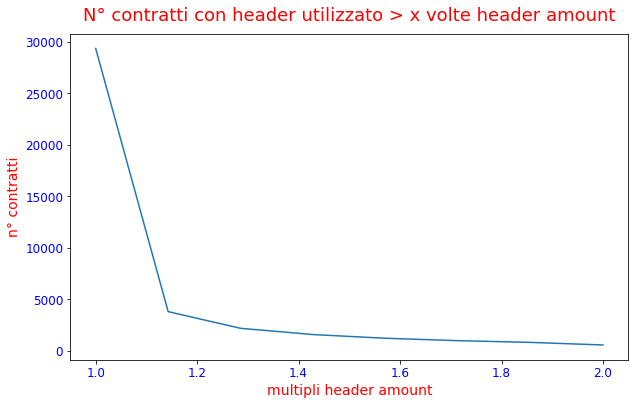

In [19]:
oltre=[]
for i in np.linspace(1, 2, 8):
    oltre.append((utilizzato_maggiore['header_utilizzato']/utilizzato_maggiore['Header amount']>i).value_counts()[1])
title_ticks_ecc('N° contratti con header utilizzato > x volte header amount', 'multipli header amount', 'n° contratti')
plt.plot(np.linspace(1, 2, 8), oltre)

In [28]:
#### Checking that in each Life% snapshot the number of contracts (rows) is the same

lens= []
lifes= [str(int(100* float(life.split('%')[0]))) + '%' for life in life_columns]

for i in range(10):
    lens.append(len(final_aggregated[final_aggregated['life%']== lifes[i]]))
lens # [73253, 73253, 73253, 73253, 73253, 73253, 73253, 73253, 73253, 73253]

[73253, 73253, 73253, 73253, 73253, 73253, 73253, 73253, 73253, 73253]

In [32]:
def date_between(start_date, end_date, percentage_middle_desidered):
    return start_date + (end_date - start_date)*percentage_middle_desidered

In [34]:
final_aggregated['lifetime_date']= final_aggregated.apply(lambda row: date_between(row['Validity start date'], row['Validity end date'],
                                int(row['life%'][:-1])/100 ), axis=1)

In [35]:
final_aggregated['days_since_beginning']= final_aggregated.apply(
    lambda row: (row['lifetime_date'] - row['Validity start date']).days, axis=1)

In [36]:
def giorni_passati(row): 
    """Arco temporale tra ultimo ordine e data inizio"""
    """ Non c'è bisogno del Try Except, non dà errore """
    
    try:
        if row['num_orders']== 0:
            return 'Nessun ordine'
        return (row['last_order_date']- row['Validity start date']).days
    except:
        return 2900000   #ci sono tipo 30 end dates in anno 9999. (9999-2019)* 365= 2912700 giorni

In [252]:
def giorni_1st_order(row): 
    """Arco temporale tra ultimo ordine e data inizio"""
    #try:
    if row['num_orders']== 0:
        return 'Nessun ordine'
    return (row['first_order_date']- row['Validity start date']).days
    #except:
        #return 2900000   #ci sono tipo 30 end dates in anno 9999. (9999-2019)* 365= 2912700 giorni

**Metto "Nessun ordine" in last_order_date e days_til_last_order' lì dove non ho ordini..**  <br>

In [38]:
#final_aggregated['days_til_last_order']= final_aggregated.apply(lambda row: (row['last_order_date']- row['Validity start date']).days, axis=1)

final_aggregated['days_til_first_order']= final_aggregated.apply(giorni_1st_order, axis=1)
final_aggregated['days_til_last_order']= final_aggregated.apply(giorni_passati, axis=1)

final_aggregated[['Purchase document', 'Contract Type', 'Validity start date', 'Validity end date', 'first_order_date', 'last_order_date','header_utilizzato', 'num_orders', 'avg_importo_ordine', 'std_importo_ordine', 'days_til_first_order','days_til_last_order', 
                  'std_order_intervals', 'life%']].head(10)

,Purchase document,Contract Type,Validity start date,Validity end date,first_order_date,last_order_date,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,days_til_first_order,days_til_last_order,std_order_intervals,life%
0,SR\4650003169,Y,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-03-18 00:00:00,2013-05-26 00:00:00,437990.54,2,218995,79726.6,-501,-432,285.0,0%
1,SR\4650003169,Y,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-03-18 00:00:00,2013-05-26 00:00:00,437990.54,2,218995,79726.6,-501,-432,285.0,10%
2,SR\4650003169,Y,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-03-18 00:00:00,2017-05-26 00:00:00,578625.88,3,192875,72283.7,-501,1029,824.1,20%
3,SR\4650003169,Y,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-03-18 00:00:00,2019-07-09 00:00:00,808492.39,5,161698,71481.3,-501,1803,650.7,30%
4,SR\4650003169,Y,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-03-18 00:00:00,2019-07-09 00:00:00,808492.39,5,161698,71481.3,-501,1803,650.7,40%
5,SR\4650003169,Y,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-03-18 00:00:00,2019-07-09 00:00:00,808492.39,5,161698,71481.3,-501,1803,650.7,50%
6,SR\4650003169,Y,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-03-18 00:00:00,2019-07-09 00:00:00,808492.39,5,161698,71481.3,-501,1803,650.7,60%
7,SR\4650003169,Y,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-03-18 00:00:00,2019-07-09 00:00:00,808492.39,5,161698,71481.3,-501,1803,650.7,70%
8,SR\4650003169,Y,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-03-18 00:00:00,2019-07-09 00:00:00,808492.39,5,161698,71481.3,-501,1803,650.7,80%
9,SR\4650003169,Y,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-03-18 00:00:00,2019-07-09 00:00:00,808492.39,5,161698,71481.3,-501,1803,650.7,90%


# Calculating ladling rate and target (contract consumption)

In [39]:
def get_key_from_value(diz, value):
    for key in diz:
        if diz[key]== value:
            return key

In [40]:
def add_percentage_used(row):
    try:
        percentage_usato= row['header_utilizzato']/row['Header amount']
        return round(percentage_usato*100,2)
    except:
        return 'NOT DEFINED'

In [41]:
def rate_ordini_al_mese(row): 
    try:
        if row['num_orders']==0:   #se non ho effettuato ordini
            return 'Nessun ordine'
        
        elif row['num_orders']>0 and row['days_since_beginning']==0:
            #return 'ORDINATO SUBITO'
            return 100
        else:
            rate= row['num_orders']/row['days_since_beginning']
            #return round(rate*100,2)
            return round(rate*30,2)   #non lo voglio in %: se ho fatto 15 ordine in un mese, voglio 0.5
    except:
        return 'NOT DEFINED'

In [42]:
def frequenza_giorni_per_ordine(row): 
    """E' LA FREQUENZA MEDIA DI UN ORDINE"""
    try:
        if row['num_orders']==0:   #se non ho effettuato ordini
            return 'Nessun ordine'
        
        elif row['days_til_last_order']>0 and row['num_orders']==0:
            return 'NESSUN ORDINE'
        else:
            rate= row['days_til_last_order']/row['num_orders']
            return round(rate,2)
    except:
        return 'NOT DEFINED'

In [43]:
def durata_nominale(row): 
    """Mi creo la durata nominale del contratto espressa in giorni"""
    try:
        return (row['Validity end date'] - row['Validity start date']).days
    except OutOfBoundsDatetime:
        return 2900000   #ci sono tipo 30 end dates in anno 9999. (9999-2019)* 365= 2912700 giorni

## Label for classification problem: 0 if the contract has not been consumed, 1 partially and 2 totally (more than 90%, for a business constraint)

In [44]:
def crea_labels_from_attinto(row, lower_bound= 0.20, upper_bound=0.90):
    if row['Active contract flag']== 'N':  #se è chiuso
        try:
            percentage_usato= row['header_utilizzato']/row['Header amount']
            if percentage_usato< lower_bound:
                return 0  #non utilizzo nulla approssimativamente
            elif percentage_usato> upper_bound:
                return 2   # se utilizzo praticamente tutto
            else:
                return 1  #se utilizzo parzialmente, diciamo tra lower bound e upper bound
        except:
            return 10
    else:
        return 'NO LABEL'

In [78]:
god= aggregated_full_life.copy()
god.shape #(73253, 9)

(73253, 9)

In [79]:
#god= god[['Purchase document', 'header_utilizzato']]
god.head(2) 

,Purchase document,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals
0,CR\8400052408,386175.70,19.0,20325.036842,9800.64038,2016-02-15,2012-04-18,78.315789,62.162916
1,CR\8400052451,121497.44,6.0,20249.573333,14897.19732,2014-05-27,2012-07-17,143.166667,24.871001


In [80]:
god_labels= tutti_contratti.merge(god, on='Purchase document')
god_labels[['Purchase document', 'Purchase document type', 'Contract Type', 'Header amount',
        'Validity start date', 'Validity end date', 'header_utilizzato' ]].tail(2)

,Purchase document,Purchase document type,Contract Type,Header amount,Validity start date,Validity end date,header_utilizzato
73251,S4\8400143702,T,N,545808.37,2019-07-01 00:00:00,2019-12-31 00:00:00,0.00
73252,S4\8400115890,T,N,1298062.44,2017-01-01 00:00:00,2018-09-27 00:00:00,1298048.22


In [81]:
god_labels['label']= god_labels.apply(crea_labels_from_attinto, axis=1)

final_lables= god_labels[['Purchase document','label' ]]
god_labels.shape  #(73253, 26)

(73253, 33)

#### Creating Nominal Duration, % used, landling rate and average frequency order

In [46]:
final_aggregated['durata_nominale_gg']= final_aggregated.apply(durata_nominale, axis=1)
final_aggregated['percentage_used']= final_aggregated.apply(add_percentage_used, axis=1)
final_aggregated['ordini/mese']= final_aggregated.apply(rate_ordini_al_mese, axis=1)
final_aggregated['frequenza media ordini']= final_aggregated.apply(frequenza_giorni_per_ordine, axis=1)
#final_aggregated['label']= final_aggregated.apply(crea_labels_from_attinto, axis=1)
final_aggregated.tail(2)

,Purchase document,Validity start date,Validity end date,Global Business line,Contract,Purchase document type,Job type,Document date,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,lifetime_date,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,frequenza media ordini
732528,S4\8400115890,2017-01-01 00:00:00,2018-09-27 00:00:00,GIT,S4\84S0068756,T,S,2017-09-28,0000000000,GIT,N,1298062.44,SPPI26,N,138378,Y,T,Centro,IT,ITP,IT,IT500,N,N,1298048.22,45,28845.5,43799.9,2017-09-28 00:00:00,2017-09-28 00:00:00,6,39.8,{3: 45},80%,2018-05-23 04:48:00,507,270,270,634,100.0,2.66,6
732529,S4\8400115890,2017-01-01 00:00:00,2018-09-27 00:00:00,GIT,S4\84S0068756,T,S,2017-09-28,0000000000,GIT,N,1298062.44,SPPI26,N,138378,Y,T,Centro,IT,ITP,IT,IT500,N,N,1298048.22,45,28845.5,43799.9,2017-09-28 00:00:00,2017-09-28 00:00:00,6,39.8,{3: 45},90%,2018-07-25 14:24:00,570,270,270,634,100.0,2.37,6


In [48]:
final_aggregated= final_aggregated.merge(final_lables, on= 'Purchase document', how='left')
final_aggregated.shape #(366265, 42)

(732530, 43)

In [49]:
final_aggregated= final_aggregated.merge(god_labels[['header_utilizzato','Purchase document']] , on= 'Purchase document', how='left')
final_aggregated.head()

,Purchase document,Validity start date,Validity end date,Global Business line,Contract,Purchase document type,Job type,Document date,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag,header_utilizzato_x,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,lifetime_date,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,frequenza media ordini,label,header_utilizzato_y
0,SR\4650003169,2014-08-01 00:00:00,2034-12-31 00:00:00,GRE,nd,A,S,2013-03-18,nd,EGP,Y,36000000.0,SPPT10,Y,ZA4930138393,N,#,Estero,ZA,RSS,ZA,nd,Y,N,437990.54,2,218995,79726.6,2013-05-26 00:00:00,2013-03-18 00:00:00,-216,285.0,"{2: 1, 1: 1}",0%,2014-08-01 00:00:00,0,-501,-432,7457,1.22,100,-216,NO LABEL,808492.39
1,SR\4650003169,2014-08-01 00:00:00,2034-12-31 00:00:00,GRE,nd,A,S,2013-03-18,nd,EGP,Y,36000000.0,SPPT10,Y,ZA4930138393,N,#,Estero,ZA,RSS,ZA,nd,Y,N,437990.54,2,218995,79726.6,2013-05-26 00:00:00,2013-03-18 00:00:00,-216,285.0,"{2: 1, 1: 1}",10%,2016-08-15 16:48:00,745,-501,-432,7457,1.22,0.08,-216,NO LABEL,808492.39
2,SR\4650003169,2014-08-01 00:00:00,2034-12-31 00:00:00,GRE,nd,A,S,2013-03-18,nd,EGP,Y,36000000.0,SPPT10,Y,ZA4930138393,N,#,Estero,ZA,RSS,ZA,nd,Y,N,578625.88,3,192875,72283.7,2017-05-26 00:00:00,2013-03-18 00:00:00,343,824.1,"{2: 2, 1: 1}",20%,2018-08-31 09:36:00,1491,-501,1029,7457,1.61,0.06,343,NO LABEL,808492.39
3,SR\4650003169,2014-08-01 00:00:00,2034-12-31 00:00:00,GRE,nd,A,S,2013-03-18,nd,EGP,Y,36000000.0,SPPT10,Y,ZA4930138393,N,#,Estero,ZA,RSS,ZA,nd,Y,N,808492.39,5,161698,71481.3,2019-07-09 00:00:00,2013-03-18 00:00:00,360.6,650.7,"{2: 2, 4: 1, 3: 1, 1: 1}",30%,2020-09-15 02:24:00,2237,-501,1803,7457,2.25,0.07,360.6,NO LABEL,808492.39
4,SR\4650003169,2014-08-01 00:00:00,2034-12-31 00:00:00,GRE,nd,A,S,2013-03-18,nd,EGP,Y,36000000.0,SPPT10,Y,ZA4930138393,N,#,Estero,ZA,RSS,ZA,nd,Y,N,808492.39,5,161698,71481.3,2019-07-09 00:00:00,2013-03-18 00:00:00,360.6,650.7,"{2: 2, 4: 1, 3: 1, 1: 1}",40%,2022-09-30 19:12:00,2982,-501,1803,7457,2.25,0.05,360.6,NO LABEL,808492.39


In [50]:
final_aggregated.rename({'header_utilizzato_x': 'header_utilizzato', 'header_utilizzato_y': 'final_utilizzato'}, axis=1, inplace=True)
final_agg_orders_done= final_aggregated[final_aggregated['num_orders']>0]
len(final_agg_orders_done)   #241405

In [51]:
## checking some created features
final_aggregated.iloc[7:11, 22:]

,Professional services flag,Energy convey flag,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,lifetime_date,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,frequenza media ordini,label,final_utilizzato
7,Y,N,808492.39,5,161698,71481.3,2019-07-09 00:00:00,2013-03-18 00:00:00,360.6,650.7,"{2: 2, 4: 1, 3: 1, 1: 1}",70%,2028-11-14 21:36:00,5219,-501,1803,7457,2.25,0.03,360.6,NO LABEL,808492.39
8,Y,N,808492.39,5,161698,71481.3,2019-07-09 00:00:00,2013-03-18 00:00:00,360.6,650.7,"{2: 2, 4: 1, 3: 1, 1: 1}",80%,2030-11-30 14:24:00,5965,-501,1803,7457,2.25,0.03,360.6,NO LABEL,808492.39
9,Y,N,808492.39,5,161698,71481.3,2019-07-09 00:00:00,2013-03-18 00:00:00,360.6,650.7,"{2: 2, 4: 1, 3: 1, 1: 1}",90%,2032-12-15 07:12:00,6711,-501,1803,7457,2.25,0.02,360.6,NO LABEL,808492.39
10,N,N,0.00,0,Nessun_ordine,Nessun_ordine,Nessun ordine,Nessun_ordine,Nessun_ordine,-100.0,Nessun_ordine,0%,2013-12-05 00:00:00,0,Nessun ordine,Nessun ordine,1303,0.00,Nessun ordine,Nessun ordine,2,9585253.14


In [57]:
final_agg_orders_done[['Purchase document', 'Purchase document type', 'Contract Type', 'Active contract flag','Header amount',
                      'Validity start date', 'Validity end date', 'last_order_date', 'days_since_beginning', 'header_utilizzato', 'num_orders', 
                       'ordini/mese', 'std_order_intervals','label']].head(2)

,Purchase document,Purchase document type,Contract Type,Active contract flag,Header amount,Validity start date,Validity end date,last_order_date,days_since_beginning,header_utilizzato,num_orders,ordini/mese,std_order_intervals,label
0,SR\4650003169,A,Y,Y,36000000.0,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-05-26 00:00:00,0,437990.54,2,100,285.0,NO LABEL
1,SR\4650003169,A,Y,Y,36000000.0,2014-08-01 00:00:00,2034-12-31 00:00:00,2013-05-26 00:00:00,745,437990.54,2,0.08,285.0,NO LABEL


### Removing contracts with 1st order before Validity Start Date

In [60]:
contr_da_togliere= final_agg_orders_done[final_agg_orders_done['days_til_first_order']<0]['Purchase document'].unique().tolist()

In [61]:
final_aggregated= final_aggregated[final_aggregated['Purchase document'].isin(contr_da_togliere)== False]

In [62]:
final_agg_orders_done= final_agg_orders_done[final_agg_orders_done['days_til_last_order']>0]

In [63]:
len(final_agg_orders_done[final_agg_orders_done['days_til_last_order']<0])    #0, tolti

0

In [64]:
#controllo che sto togliendo stesso n° contratti per ogni fotografia
lens= []
lifes= [str(int(100* float(life.split('%')[0]))) + '%' for life in life_columns]

for i in range(5):
    lens.append(len(final_aggregated[final_aggregated['life%']== lifes[i]]))
lens # [69631, 69631, 69631, 69631, 69631]

[69631, 69631, 69631, 69631, 69631]

In [67]:
final_agg_orders_done= final_aggregated[final_aggregated['num_orders']>0]
len(final_aggregated), len(final_agg_orders_done)  #(348155, 223295)

(696310, 413347)

#### Create Acceleration (eur) in respect to the "Perfect Slope"

In [71]:
final_aggregated['Ideal Slope(euro/gg)']= (final_aggregated['Header amount']/final_aggregated['durata_nominale_gg']).apply(lambda x: round(x,1))

final_aggregated.iloc[:2, 21:]

,Main Requesting unit,Professional services flag,Energy convey flag,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,lifetime_date,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,frequenza media ordini,label,final_utilizzato,Ideal Slope(euro/gg)
10,nd,N,N,0.00,0,Nessun_ordine,Nessun_ordine,Nessun ordine,Nessun_ordine,Nessun_ordine,-100.0,Nessun_ordine,0%,2013-12-05 00:00:00,0,Nessun ordine,Nessun ordine,1303,0.00,Nessun ordine,Nessun ordine,2,9585253.14,7521.1
11,nd,N,N,752769.52,1543,487.861,883.573,2014-04-14 00:00:00,2014-01-13 00:00:00,0.1,1.0,"{1: 1368, 2: 175}",10%,2014-04-14 07:12:00,130,39,130,1303,7.68,356.08,0.08,2,9585253.14,7521.1


In [72]:
## So l'ideal che dovrei spendere in un giorno. La slope ideale è fino a % di vita
final_aggregated['Ideal Slope(euro/%life)']= (
            final_aggregated['Ideal Slope(euro/gg)']* final_aggregated['days_since_beginning']).apply(lambda x: round(x,1))

final_aggregated.iloc[:2, 21:]

,Main Requesting unit,Professional services flag,Energy convey flag,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,lifetime_date,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,frequenza media ordini,label,final_utilizzato,Ideal Slope(euro/gg),Ideal Slope(euro/%life)
10,nd,N,N,0.00,0,Nessun_ordine,Nessun_ordine,Nessun ordine,Nessun_ordine,Nessun_ordine,-100.0,Nessun_ordine,0%,2013-12-05 00:00:00,0,Nessun ordine,Nessun ordine,1303,0.00,Nessun ordine,Nessun ordine,2,9585253.14,7521.1,0.0
11,nd,N,N,752769.52,1543,487.861,883.573,2014-04-14 00:00:00,2014-01-13 00:00:00,0.1,1.0,"{1: 1368, 2: 175}",10%,2014-04-14 07:12:00,130,39,130,1303,7.68,356.08,0.08,2,9585253.14,7521.1,977743.0


In [73]:
## ACCELERATION IS HEADER AMOUNT UTILIZED (TRUE SLOPE), DIVIDED BY IDEAL SLOPE

final_aggregated['True/Ideal Slope'] = (
        final_aggregated['header_utilizzato']/ final_aggregated['Ideal Slope(euro/%life)']).apply(lambda x: round(x,1))

final_aggregated.iloc[:5, 25:]

,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,lifetime_date,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,frequenza media ordini,label,final_utilizzato,Ideal Slope(euro/gg),Ideal Slope(euro/%life),True/Ideal Slope
10,0,Nessun_ordine,Nessun_ordine,Nessun ordine,Nessun_ordine,Nessun_ordine,-100.0,Nessun_ordine,0%,2013-12-05 00:00:00,0,Nessun ordine,Nessun ordine,1303,0.00,Nessun ordine,Nessun ordine,2,9585253.14,7521.1,0.0,NaN
11,1543,487.861,883.573,2014-04-14 00:00:00,2014-01-13 00:00:00,0.1,1.0,"{1: 1368, 2: 175}",10%,2014-04-14 07:12:00,130,39,130,1303,7.68,356.08,0.08,2,9585253.14,7521.1,977743.0,0.8
12,3266,443.988,740.401,2014-08-22 00:00:00,2014-01-13 00:00:00,0.1,0.7,"{1: 1368, 2: 1227, 3: 671}",20%,2014-08-22 14:24:00,260,39,260,1303,14.80,376.85,0.08,2,9585253.14,7521.1,1955486.0,0.7
13,5096,427.457,707.975,2014-12-30 00:00:00,2014-01-13 00:00:00,0.1,0.6,"{1: 1368, 3: 1281, 2: 1227, 4: 1220}",30%,2014-12-30 21:36:00,390,39,390,1303,22.23,392,0.08,2,9585253.14,7521.1,2933229.0,0.7
14,6736,442.263,725.353,2015-05-10 00:00:00,2014-01-13 00:00:00,0.1,0.6,"{1: 2555, 2: 1679, 3: 1281, 4: 1221}",40%,2015-05-10 04:48:00,521,39,521,1303,30.40,387.87,0.08,2,9585253.14,7521.1,3918493.1,0.8


#### Removing contracts started before 2012 (business constraint)

In [74]:
final_aggregated['Validity start date'].apply(lambda x: x.year).value_counts()

2014    103630
2018     99110
2013     94290
2015     92940
2012     90870
2017     81040
2016     65550
2019     57830
2011      4930
2010      1590
2009      1540
2008      1010
2007       500
2006       420
2005       420
2003       180
2004       180
1998        70
2002        60
2000        50
1999        40
2020        40
2001        20
Name: Validity start date, dtype: int64

In [75]:
anno_di_partenza= 2012

In [76]:
anni_scartati= final_aggregated['Validity start date'].apply(lambda x: x.year)[
    final_aggregated['Validity start date'].apply(lambda x: x.year < anno_di_partenza)]
len(anni_scartati) #3303

11010

In [77]:
prima_del_2012= final_aggregated[final_aggregated['Validity start date'].apply(lambda x: x.year < 2012)]
prima_del_2011= final_aggregated[final_aggregated['Validity start date'].apply(lambda x: x.year < 2011)]
prima_del_2010= final_aggregated[final_aggregated['Validity start date'].apply(lambda x: x.year < 2010)]

In [78]:
prima_del_2012.shape, prima_del_2011.shape, prima_del_2010.shape

((11010, 47), (6080, 47), (4490, 47))

(-1, 20)

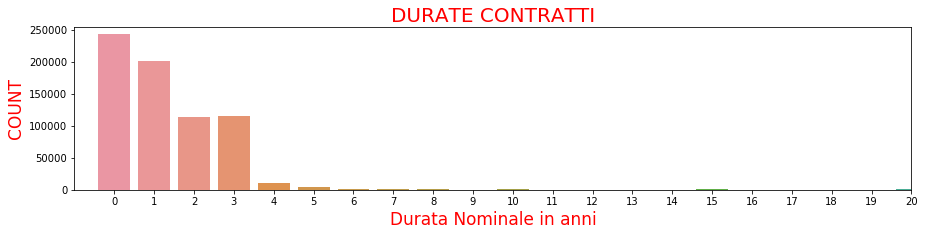

In [79]:
plt.figure(figsize=(15,3))
plt.title('DURATE CONTRATTI', fontsize=20, color= 'r', pad=5)
sns.countplot((final_aggregated['durata_nominale_gg']/365).apply(lambda x: int(x)))
plt.xlabel('Durata Nominale in anni', color='r', fontsize= 17)
plt.ylabel('COUNT', color='r', fontsize= 17)
plt.xlim(-1,20)

Text(0, 0.5, 'COUNT')

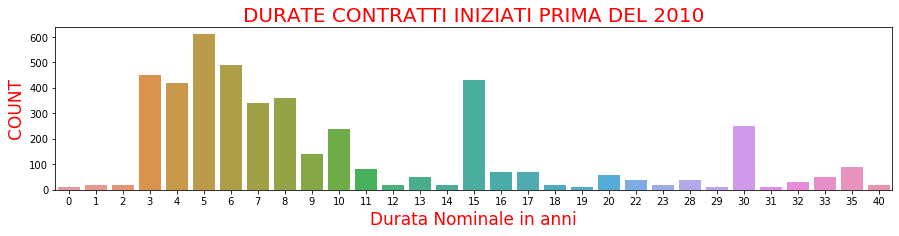

In [80]:
plt.figure(figsize=(15,3))
plt.title('DURATE CONTRATTI INIZIATI PRIMA DEL 2010', fontsize=20, color= 'r', pad=5)
sns.countplot((prima_del_2010['durata_nominale_gg']/365).apply(lambda x: int(x)))
plt.xlabel('Durata Nominale in anni', color='r', fontsize= 17)
plt.ylabel('COUNT', color='r', fontsize= 17)
#plt.xlim(-1,20)

(5, 23)

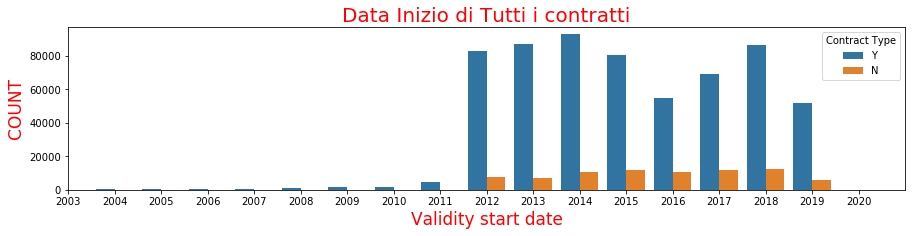

In [81]:
plt.figure(figsize=(15,3))
plt.title('Data Inizio di Tutti i contratti', fontsize=20, color= 'r', pad=5)
sns.countplot(final_aggregated['Validity start date'].apply(lambda x: x.year), hue= final_aggregated['Contract Type'])
plt.xlabel('Validity start date', color='r', fontsize= 17)
plt.ylabel('COUNT', color='r', fontsize= 17)
plt.xlim(5,23)

Text(0, 0.5, 'COUNT')

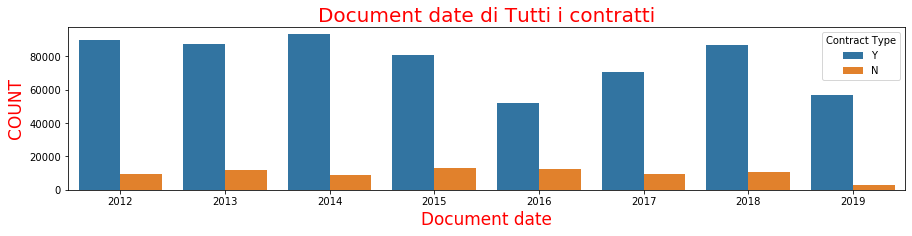

In [82]:
plt.figure(figsize=(15,3))
plt.title('Document date di Tutti i contratti', fontsize=20, color= 'r', pad=5)
sns.countplot(final_aggregated['Document date'].apply(lambda x: x.year), hue= final_aggregated['Contract Type'])
plt.xlabel('Document date', color='r', fontsize= 17)
plt.ylabel('COUNT', color='r', fontsize= 17)
#plt.xlim(5,23)

In [83]:
#############################################################################################

In [84]:
final_senza_ordini= final_aggregated[final_aggregated['num_orders']==0]
len(final_senza_ordini)  #67875

282963

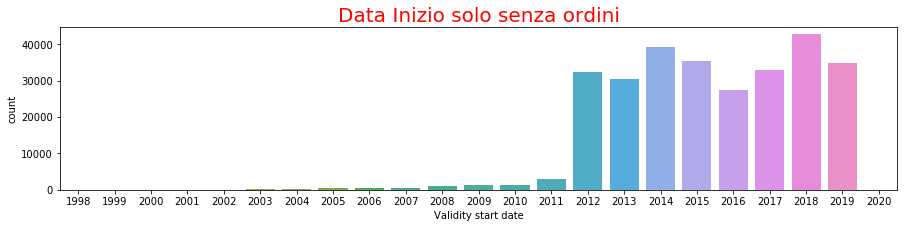

In [85]:
plt.figure(figsize=(15,3))
plt.title('Data Inizio solo senza ordini', fontsize=20, color= 'r', pad=5)
sns.countplot(final_senza_ordini['Validity start date'].apply(lambda x: x.year))

In [88]:
gennaio_1_2012 = datetime(2012, 1, 1, 0, 0)

final_aggregated= final_aggregated[final_aggregated['Validity start date']>= gennaio_1_2012]
final_aggregated.shape, final_aggregated.shape[0]/5 #342650, 45), 68530 per fotografia dopo aver tolto quelli iniziati prima del 2012

((685300, 47), 137060.0)

**Removing those which have terminated but result still active**

In [89]:
reference_date= datetime(2019, 8, 1, 0, 0)  #Scelto 1° Agosto 2019
#(datetime.today() - final_aggregated.iloc[6]['Validity start date']).days

In [91]:
terminati_per_finta= final_aggregated[(final_aggregated['Validity end date'] > reference_date) & (
                                        final_aggregated['Active contract flag']== 'N')]  #datetime.today()

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text yticklabel objects>)

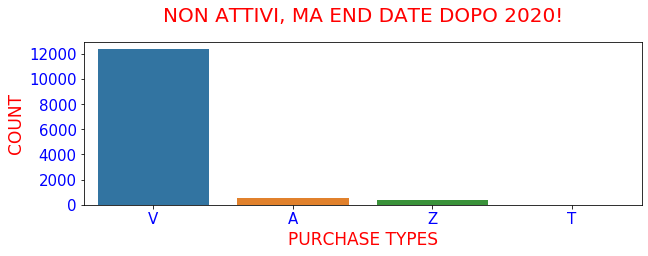

In [95]:
plt.figure(figsize=(10,3))
plt.title('NON ATTIVI, MA END DATE DOPO 2020!', fontsize=20, color= 'r', pad=20)
sns.countplot(data= terminati_per_finta, x='Purchase document type') 
plt.xlabel('PURCHASE TYPES', color='r', fontsize= 17)
plt.ylabel('COUNT', color='r', fontsize= 17)
plt.xticks(color= 'blue', fontsize=15)
plt.yticks(color= 'blue', fontsize=15)
#legend= plt.legend(fontsize=15)
#legend.get_texts()[0].set_text('Non Active')
#legend.get_texts()[1].set_text('Active')
#plt.savefig('contratti_senza_ordini.png')

In [97]:
final_aggregated= final_aggregated.drop(terminati_per_finta.index)

#check that I remove same number of rows per each snapshot
lens= []
lifes= [str(int(100* float(life.split('%')[0]))) + '%' for life in life_columns]

for i in range(5):
    lens.append(len(final_aggregated[final_aggregated['life%']== lifes[i]]))
lens # [67532, 67532, 67532, 67532, 67532]

[67208, 67208, 67208, 67208, 67208]

In [99]:
def combine_categories(colonna_float, lb, ub, n_combined):
    bins= list(map(lambda x: int(x), np.linspace(lb, ub,n_combined)))
    labels= [ str(bins[i])+ '-' + str(bins[i+1]) for i in range (len(bins)-1)]
    return pd.cut(colonna_float , bins= bins, labels= labels)

In [100]:
def combine_categories_norm(colonna_float, lb, ub, n_combined):
    bins= list(map(lambda x: round(x,2), np.linspace(lb, ub,n_combined)))
    labels= [ str(bins[i])+ '-' + str(bins[i+1]) for i in range (len(bins)-1)]
    return pd.cut(colonna_float , bins= bins, labels= labels)

### Excluding active contracts (in training phase, I need to have label for each contract..but fo the active ones I don't know the end of the story..!)

In [103]:
df_rolling_train= final_aggregated[final_aggregated['Active contract flag'] == 'N']
df_rolling_train.shape,  df_rolling_train.shape[0]/10   #((523520, 45), 52352.0 per fotografia

((523520, 47), 52352.0)

In [106]:
df_rolling_train= df_rolling_train.drop(['Contract'], axis=1)  #'Purchase document',
df_rolling_train.head(1)

,Purchase document,Validity start date,Validity end date,Global Business line,Purchase document type,Job type,Document date,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,lifetime_date,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,frequenza media ordini,label,final_utilizzato,Ideal Slope(euro/gg),Ideal Slope(euro/%life),True/Ideal Slope
10,DI\8400060305,2013-12-05 00:00:00,2017-06-30 00:00:00,GIN,Z,F,2013-12-05,0000000000,ITA,Y,9800000.0,FEMI01,N,10749,Y,S,Nord,IT,APR,IT,nd,N,N,0.0,0,Nessun_ordine,Nessun_ordine,Nessun ordine,Nessun_ordine,Nessun_ordine,-100.0,Nessun_ordine,0%,2013-12-05,0,Nessun ordine,Nessun ordine,1303,0.0,Nessun ordine,Nessun ordine,2,9585253.14,7521.1,0.0,NaN


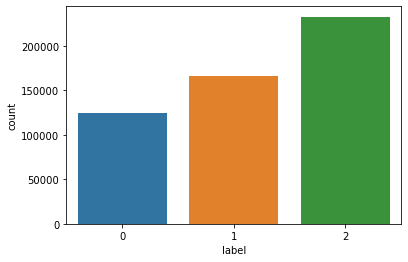

In [108]:
sns.countplot(df_rolling_train['label'])

In [109]:
df_rolling_train.shape,  df_rolling_train.shape[0]/10 #((261760, 44), 52352.0)

((523520, 46), 52352.0)

####  Removing Document date, lifetime_date, last_order_Date, frequenza media ordini

In [110]:
df_rolling_train= df_rolling_train.drop(['Document date', 'lifetime_date'], axis=1)
df_rolling_train= df_rolling_train.drop(['header_utilizzato', 'frequenza media ordini'], axis=1)

## Taking off the irrelevant ones: header amount < 10 and nominal duration < 30 days

In [158]:
df_rolling_train= df_rolling_train[(df_rolling_train['Header amount'] >= 10000) & (df_rolling_train['durata_nominale_gg']>=30)]

df_rolling_train.shape, df_rolling_train.shape[0]/len(life_columns) #((377757, 40), 41973.0 per fotografia

((419730, 42), 41973.0)

In [160]:
df_rolling_train['True/Ideal Slope'].describe()

count    379708.0
mean          inf
std           NaN
min           0.0
25%           0.0
50%           0.7
75%           1.3
max           inf
Name: True/Ideal Slope, dtype: float64

In [161]:
df_rolling_train['Start Year']= df_rolling_train['Validity start date'].apply(lambda x: x.year)

In [162]:
slopes= df_rolling_train.groupby(['life%']).agg({'True/Ideal Slope' : {'mean': np.mean, 'std': np.std}})
slopes_year= df_rolling_train.groupby(['life%', 'Start Year']).agg({'True/Ideal Slope' : {'mean': np.mean, 'std': np.std}})

slopes.columns= slopes.columns.droplevel()
slopes_year.columns= slopes_year.columns.droplevel()

slopes

,mean,std
life%,,
0%,inf,NaN
10%,1.920246,3.531423
20%,1.375825,1.891392
30%,1.139101,1.290163
40%,1.004010,0.978950
50%,0.909127,0.788610
60%,0.847583,0.667238
70%,0.781250,0.565642
80%,0.744679,0.506542


<BarContainer object of 10 artists>

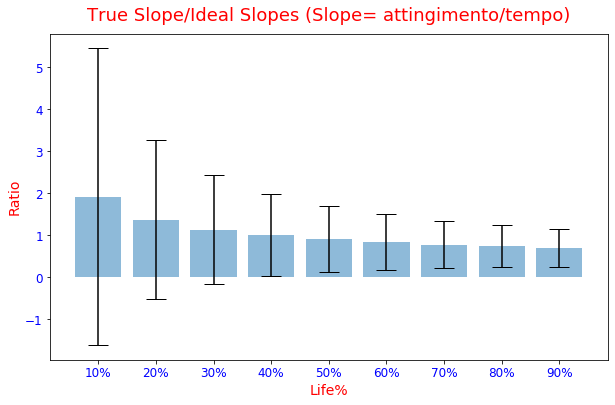

In [163]:
title_ticks_ecc('True Slope/Ideal Slopes (Slope= attingimento/tempo)', 'Life%', 'Ratio')
plt.bar(slopes.index, slopes['mean'], yerr= slopes['std'], alpha=0.5, ecolor='black', capsize=10 )

In [164]:
slopes_year.head(10).T

life%        0%                                          10%          
Start Year 2012 2013 2014 2015 2016 2017 2018 2019      2012      2013
mean        inf  inf  inf  inf  inf  inf  inf  inf  1.777930  1.935413
std         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.338261  3.489409

ValueError: num must be 1 <= num <= 9, not 10

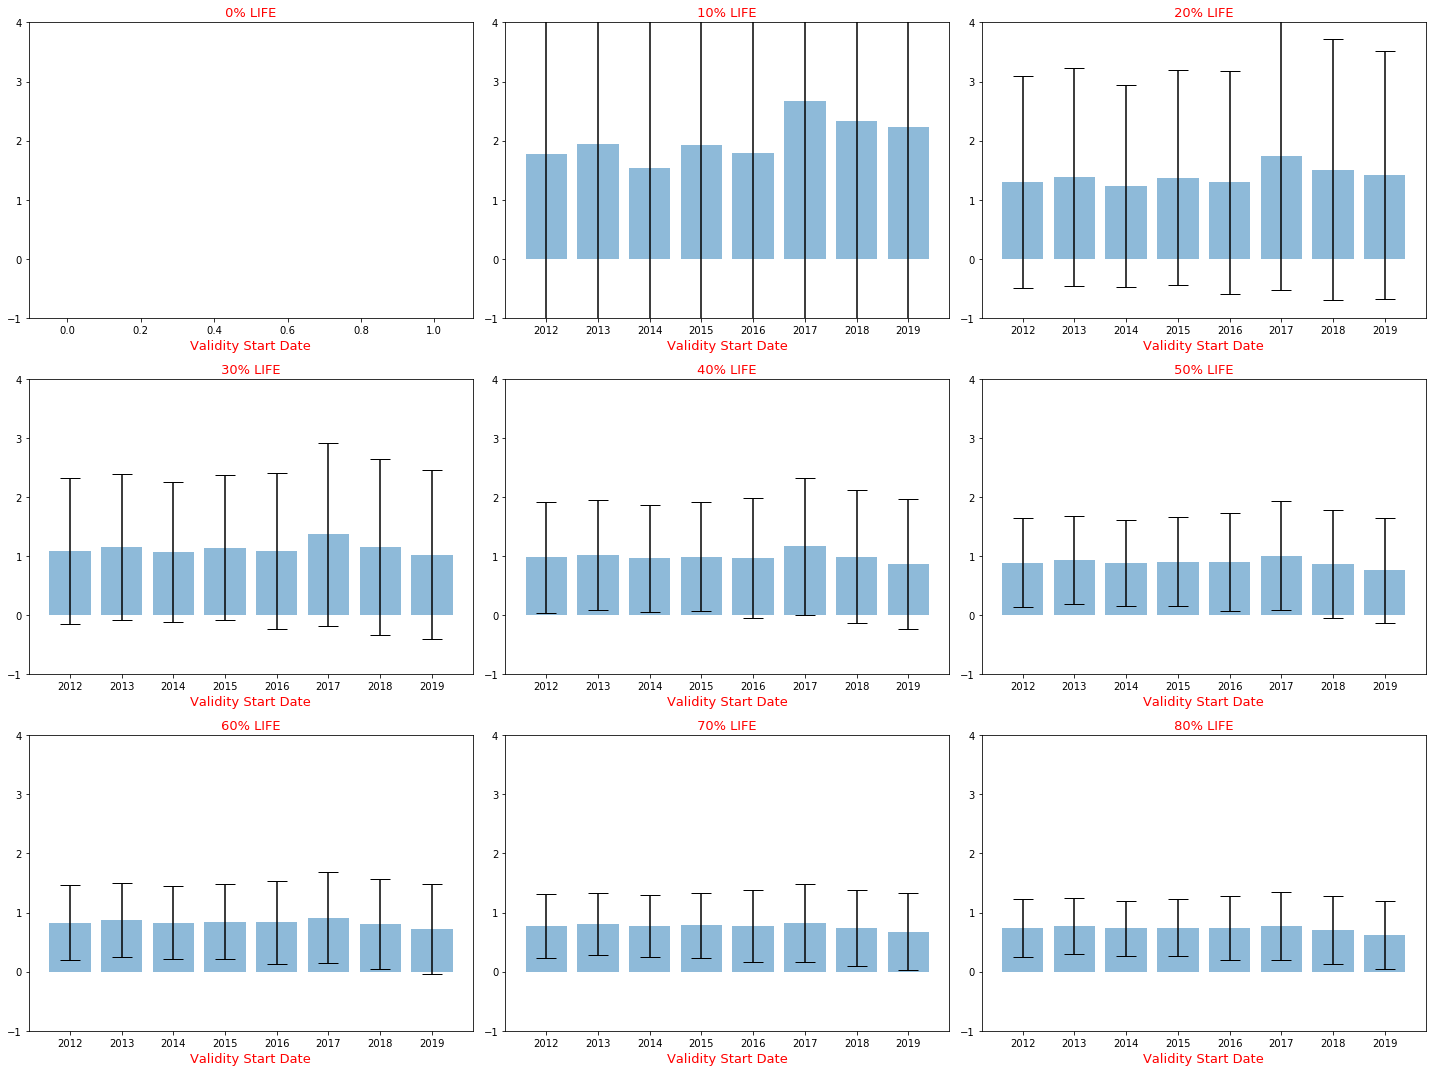

In [165]:
plt.figure(figsize= (20,15))

for i, life_perc in enumerate(df_rolling_train['life%'].unique()):
    
    plt.subplot(3, 3, i+1)
    plt.title(' {} LIFE '.format(life_perc), fontsize= 13, color='red')
    plt.bar(slopes_year.loc[life_perc].index, slopes_year.loc[life_perc]['mean'], yerr= slopes_year.loc[life_perc]['std'],
           alpha=0.5, ecolor='black', capsize=10)
    
    plt.xlabel('Validity Start Date', fontsize= 13, color='red')
    plt.ylim(-1,4)
    plt.tight_layout()

### Handling numerical variables with "no orders" string: putting 0 in some fields, value out of scale for other fields 

In [166]:
# Vedi columns transformer with mixed types
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
cols= ['num_orders', 'avg_importo_ordine', 'std_importo_ordine', 'avg_order_intervals',
                  'std_order_intervals', 'days_since_beginning', 'days_til_first_order', 'days_til_last_order', 
                  'percentage_used', 'ordini/mese', 'True/Ideal Slope']

df_rolling_train[cols].dtypes

num_orders                int64
avg_importo_ordine       object
std_importo_ordine       object
avg_order_intervals      object
std_order_intervals     float64
days_since_beginning      int64
days_til_first_order     object
days_til_last_order      object
percentage_used         float64
ordini/mese              object
True/Ideal Slope        float64
dtype: object

In [168]:
#### Metto 0 quando ho zero ordini##########

df_rolling_train['ordini/mese']= df_rolling_train['ordini/mese'].apply(lambda x: 0 if isinstance(x, str) else x) #di fatto non faccio ordini al mese


######### A queste altre invece metto n° fuori scala, per far capire che non c'è stato ordine #####
out_of_scale= -100

df_rolling_train['days_til_last_order']= df_rolling_train['days_til_last_order'].apply(lambda x: out_of_scale if isinstance(x, str) else x)
df_rolling_train['days_til_first_order']= df_rolling_train['days_til_first_order'].apply(lambda x: out_of_scale if isinstance(x, str) else x)
df_rolling_train['avg_importo_ordine']= df_rolling_train['avg_importo_ordine'].apply(lambda x: out_of_scale if isinstance(x, str) else x)
df_rolling_train['avg_order_intervals']= df_rolling_train['avg_order_intervals'].apply(lambda x: out_of_scale if isinstance(x, str) else x)

######### A std dev importo e intervallo metto -100 se non ho fatto ordini, -50 se ne ho fatto 1
df_rolling_train['std_importo_ordine']= df_rolling_train.apply(
                        lambda row: out_of_scale if row['num_orders']==0 else(out_of_scale/2 if row['num_orders']==1 else row['std_importo_ordine']), axis=1)

df_rolling_train['std_order_intervals']= df_rolling_train.apply(
                        lambda row: out_of_scale if row['num_orders']==0 else(out_of_scale/2 if row['num_orders']==1 else row['std_order_intervals']), axis=1)

df_rolling_train[cols].dtypes

num_orders                int64
avg_importo_ordine      float64
std_importo_ordine      float64
avg_order_intervals     float64
std_order_intervals     float64
days_since_beginning      int64
days_til_first_order      int64
days_til_last_order       int64
percentage_used         float64
ordini/mese             float64
True/Ideal Slope        float64
dtype: object

##### Trasform life with label encoder

In [170]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_rolling_train['life%_enc']= le.fit_transform(df_rolling_train['life%'])
df_rolling_train.iloc[:7, 20:]

,Professional services flag,Energy convey flag,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,label,final_utilizzato,Ideal Slope(euro/gg),Ideal Slope(euro/%life),True/Ideal Slope,Start Year,life%_enc
10,N,N,0,-100.000000,-100.000000,Nessun ordine,Nessun_ordine,-100.0,-100.0,Nessun_ordine,0%,0,-100,-100,1303,0.00,0.00,2,9585253.14,7521.1,0.0,NaN,2013,0
11,N,N,1543,487.860998,883.572898,2014-04-14 00:00:00,2014-01-13 00:00:00,0.1,1.0,"{1: 1368, 2: 175}",10%,130,39,130,1303,7.68,356.08,2,9585253.14,7521.1,977743.0,0.8,2013,1
12,N,N,3266,443.987645,740.400811,2014-08-22 00:00:00,2014-01-13 00:00:00,0.1,0.7,"{1: 1368, 2: 1227, 3: 671}",20%,260,39,260,1303,14.80,376.85,2,9585253.14,7521.1,1955486.0,0.7,2013,2
13,N,N,5096,427.457045,707.975073,2014-12-30 00:00:00,2014-01-13 00:00:00,0.1,0.6,"{1: 1368, 3: 1281, 2: 1227, 4: 1220}",30%,390,39,390,1303,22.23,392.00,2,9585253.14,7521.1,2933229.0,0.7,2013,3
14,N,N,6736,442.263432,725.352984,2015-05-10 00:00:00,2014-01-13 00:00:00,0.1,0.6,"{1: 2555, 2: 1679, 3: 1281, 4: 1221}",40%,521,39,521,1303,30.40,387.87,2,9585253.14,7521.1,3918493.1,0.8,2013,4
15,N,N,8672,428.344256,696.434666,2015-09-17 00:00:00,2014-01-13 00:00:00,0.1,0.5,"{1: 2555, 2: 2502, 3: 2394, 4: 1221}",50%,651,39,651,1303,37.90,399.63,2,9585253.14,7521.1,4896236.1,0.8,2013,5
16,N,N,10938,428.112295,692.956510,2016-01-25 00:00:00,2014-01-13 00:00:00,0.1,0.5,"{1: 3060, 4: 2775, 3: 2601, 2: 2502}",60%,781,39,781,1303,47.78,420.15,2,9585253.14,7521.1,5873979.1,0.8,2013,6


In [174]:
df_rolling_train= df_rolling_train.drop('Energy convey flag', axis=1, errors= 'ignore')
df_rolling_train.shape   #(379611, 41)

(419730, 43)

##### Analysis Main Requestin Unit

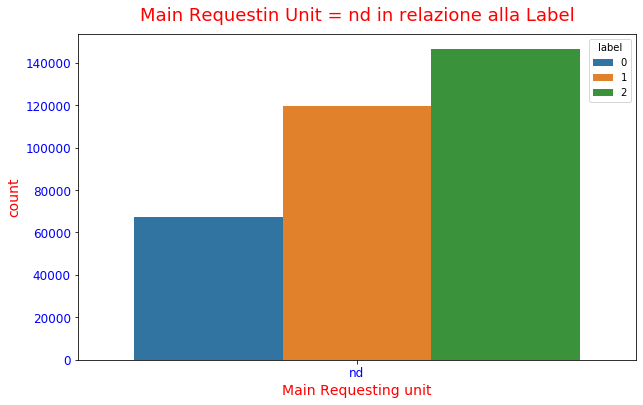

In [176]:
title_ticks_ecc('Main Requestin Unit = nd in relazione alla Label', '', '')
    
sns.countplot(data= df_rolling_train[df_rolling_train['Main Requesting unit']== 'nd'], 
              x= 'Main Requesting unit', hue= 'label')

##### handling nd values

In [175]:
nd= {}
for col in df_rolling_train.select_dtypes(include= object):
    nd[col]= round(df_rolling_train[df_rolling_train[col]== 'nd'].shape[0]*100/ df_rolling_train.shape[0], 2)
    
pd.Series(nd).sort_values(ascending= False).head() #Variant code     

Main Requesting unit    79.39
Variant code            46.82
QMG Code                 2.53
Geographical Area        0.78
Country Code             0.64
dtype: float64

In [178]:
df_rolling_train['Variant code']= df_rolling_train['Variant code'].apply(lambda x: 0 if x== 'nd' else 1)
df_rolling_train['Variant code'].value_counts()

1    223230
0    196500
Name: Variant code, dtype: int64

In [179]:
for col in df_rolling_train.drop('Main Requesting unit', axis=1).select_dtypes(include= object):
    df_rolling_train= df_rolling_train[df_rolling_train[col]!= 'nd']
df_rolling_train.shape #(364599, 41)

(405110, 43)

In [5]:
cardinalita={}
for col in df_rolling_train.drop('order_trimesters', axis=1).select_dtypes(include=[object]).columns:
    cardinalita[col]= df_rolling_train[col].nunique()
cardinalita= pd.Series(cardinalita)
cardinalita= cardinalita.sort_values(ascending=False)
#d= d.drop('life%')
cardinalita= pd.DataFrame(cardinalita, columns= ['cardinalità_classe'])
cardinalita

,cardinalità_classe
Purchase document,40511
VMD Code,12656
last_order_date,2497
Validity end date,2399
Validity start date,2201
first_order_date,2180
QMG Code,886
Main Requesting unit,556
Purchase Unit Code,76
Country Code,61


In [185]:
only_two_values= cardinalita[cardinalita['cardinalità_classe']== 2].index

diz_two_values= dict()
for col in only_two_values:
    diz_two_values[col]= list(df_rolling_train[col].unique())
    
    df_rolling_train[col]= df_rolling_train[col].apply(lambda x: 0 if x== diz_two_values[col][0] else 1 )
    print('col: ', col, 'value_counts: ', df_rolling_train[col].value_counts())


col:  Contract Type value_counts:  0    360620
1     44490
Name: Contract Type, dtype: int64
col:  Professional services flag value_counts:  0    346210
1     58900
Name: Professional services flag, dtype: int64
col:  Main material group qualification flag value_counts:  1    361960
0     43150
Name: Main material group qualification flag, dtype: int64


In [186]:
#df_rolling_train.to_pickle('./datasets/df_rolling_train160821.pk1')

#controllo che sto togliendo stesso n° contratti per ogni fotografia
lens= []

for i in df_rolling_train['life%'].unique():
    lens.append(len(df_rolling_train[df_rolling_train['life%']== i]))
lens  # [40511, 40511, 40511, 40511, 40511, 40511, 40511, 40511, 40511]

[40511, 40511, 40511, 40511, 40511, 40511, 40511, 40511, 40511, 40511]

# <center> Creating Target for regression (on contracts lifetime)

In [187]:
aggregated_full_life.shape, aggregated_full_life['Purchase document'].nunique() #((73253, 6), 73253)

((73253, 33), 73253)

In [178]:
contracts_fully_used= df_rolling_train.loc[df_rolling_train['label']==2]['Purchase document']
print('n° fully used: {}, unici: {}, check unici*10 equal to fully used --> {}'.format(len(contracts_fully_used), contracts_fully_used.nunique(), contracts_fully_used.nunique()*10)) 

n° fully used: 187880, unici: 18788, check unici*10 equal to fully used --> 187880


In [179]:
contracts_fully_used= contracts_fully_used.unique()
contracts_fully_used.shape  #19557

(18788,)

In [181]:
contracts_used_not_aggreg= join_date_fasce_final[join_date_fasce_final['Purchase document'].isin(contracts_fully_used)]
contracts_used_not_aggreg.shape, contracts_used_not_aggreg['Purchase document'].nunique()  #(1015329, 32), 23413

((969292, 39), 18788)

In [182]:
contracts_used_not_aggreg.head(2)

,Purchase document,Validity start date,Validity end date,Global Business line,Contract,Purchase document type,Job type,Document date,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag,Purchase document_ordine,Contract_ordine,Header amount_ordine,Document date_ordine,0.0%life,0.1%life,0.2%life,0.3%life,0.4%life,0.5%life,0.6%life,0.7%life,0.8%life,0.9%life,diff_intervals
710924,CR\8400052462,2012-01-19 00:00:00,2015-09-30 00:00:00,M&S,nd,Z,S,2012-01-19,0000000000,ITA,Y,624999.99,SPPI29,N,44497,N,T,Nord,IT,AMC,IT,nd,N,N,CR\1400052516,CR\8400052462,79550.74,2012-04-24,2012-01-19,2012-06-02,2012-10-15,2013-02-27,2013-07-12,2013-11-24,2014-04-08,2014-08-21,2015-01-03,2015-05-18,96.0
710923,CR\8400052462,2012-01-19 00:00:00,2015-09-30 00:00:00,M&S,nd,Z,S,2012-01-19,0000000000,ITA,Y,624999.99,SPPI29,N,44497,N,T,Nord,IT,AMC,IT,nd,N,N,CR\1400052647,CR\8400052462,4863.92,2012-05-10,2012-01-19,2012-06-02,2012-10-15,2013-02-27,2013-07-12,2013-11-24,2014-04-08,2014-08-21,2015-01-03,2015-05-18,16.0


##### Creating cumulative % consumption

In [183]:
""" Cumsum headers è somma cumulativa ma solo su quelli pienamente utilizzati"""

cumsum_headers= contracts_used_not_aggreg[['Purchase document', 'Purchase document type', 'Job type', 'Validity start date', 'Header amount','Header amount_ordine', 'Document date_ordine']]
cumsum_headers['cumsum_header']= contracts_used_not_aggreg.groupby(['Purchase document']).agg(
    {'Header amount_ordine': np.cumsum}).squeeze().values

cumsum_headers.iloc[15:21]  #giusto fatto cosi

,Purchase document,Purchase document type,Job type,Validity start date,Header amount,Header amount_ordine,Document date_ordine,cumsum_header
710933,CR\8400052462,Z,S,2012-01-19 00:00:00,624999.99,83562.38,2015-09-03,571866.74
710931,CR\8400052462,Z,S,2012-01-19 00:00:00,624999.99,4886.53,2015-11-03,576753.27
710927,CR\8400052462,Z,S,2012-01-19 00:00:00,624999.99,15950.61,2015-11-09,592703.88
129645,CR\8400052794,Z,S,2012-01-01 00:00:00,240000.00,2191.00,2012-04-10,2191.00
129658,CR\8400052794,Z,S,2012-01-01 00:00:00,240000.00,4070.00,2012-04-10,6261.00
129661,CR\8400052794,Z,S,2012-01-01 00:00:00,240000.00,6779.00,2012-04-10,13040.00


In [185]:
cumsum_headers['Percentage used']= cumsum_headers['cumsum_header']/cumsum_headers['Header amount']
cumsum_headers['Percentage used']= cumsum_headers['Percentage used'].apply(lambda x: round(x,2))
cumsum_headers.groupby('Purchase document').agg({'Percentage used':max}).head()

,Percentage used
Purchase document,
CR\8400052462,0.95
CR\8400052794,1.31
CR\8400052989,1.08
CR\8400054073,1.00
CR\8400054999,0.98


In [186]:
used_at_first_order= cumsum_headers.groupby(['Purchase document']).first()  #prendo primo ordine per ogni contratto
used_at_first_order.head()

,Purchase document type,Job type,Validity start date,Header amount,Header amount_ordine,Document date_ordine,cumsum_header,Percentage used
Purchase document,,,,,,,,
CR\8400052462,Z,S,2012-01-19,624999.99,79550.74,2012-04-24,79550.74,0.13
CR\8400052794,Z,S,2012-01-01,240000.00,2191.00,2012-04-10,2191.00,0.01
CR\8400052989,Z,S,2012-02-29,35000.00,2040.00,2012-04-24,2040.00,0.06
CR\8400054073,V,S,2012-05-31,14243.00,14243.00,2014-10-20,14243.00,1.00
CR\8400054999,Z,S,2012-09-01,3900000.00,2126.00,2012-09-28,2126.00,0.00


In [187]:
# se l importo del primo ordine (che coincide con il cumsum), maggiore di 0.9 dell header, ho usato tutto in una botta

used_at_first_order= used_at_first_order[used_at_first_order['cumsum_header'] > 0.9* used_at_first_order['Header amount'] ]
used_at_first_order.shape  #(11270, 8)

(8086, 8)

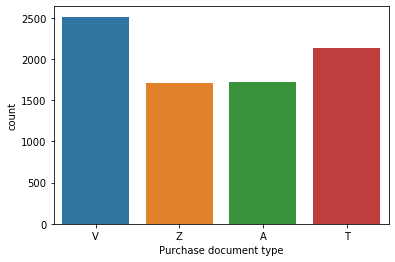

In [188]:
#sns.countplot(used_at_first_order['Job type'])
sns.countplot(used_at_first_order['Purchase document type'])

In [190]:
df_rolling_train[df_rolling_train['life%_enc']== 0].shape

vals= df_rolling_train[(df_rolling_train['life%_enc']==0)]['Purchase document type'].value_counts().to_dict()
vals

{'Z': 21294, 'V': 8294, 'A': 6474, 'T': 4449}

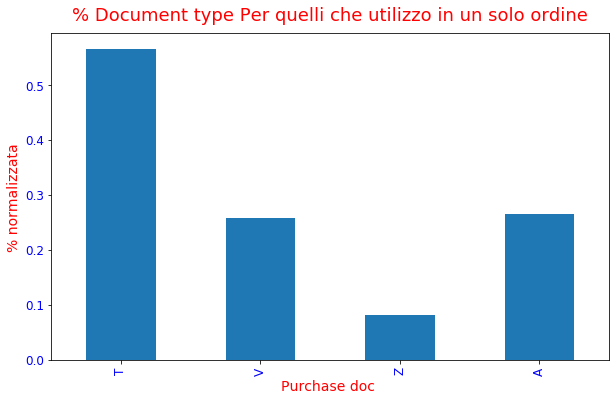

In [191]:
title_ticks_ecc('% Document type Per quelli che utilizzo in un solo ordine', 'Purchase doc ', '% normalizzata')
pd.Series(dict(zip('T V Z A'.split(), 
    used_at_first_order['Purchase document type'].value_counts().values / np.array([vals['T'], vals['V'], vals['Z'], vals['A']]))) ).plot(kind='bar')

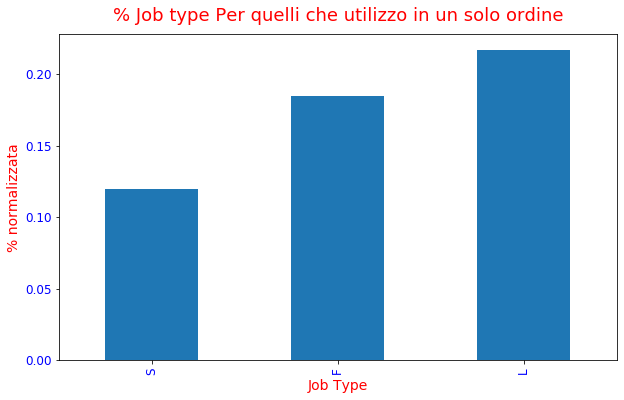

In [192]:
title_ticks_ecc('% Job type Per quelli che utilizzo in un solo ordine', 'Job Type', '% normalizzata')
pd.Series(dict(zip('S F L'.split(),used_at_first_order['Job type'].value_counts().values / np.array([31636, 14649, 7322]))) ).plot(kind='bar')

In [196]:
pd.Series(used_at_first_order.index).nunique(), len(used_at_first_order) #check ok

dates_used_1st_order= dict(zip(used_at_first_order.index, used_at_first_order['Document date_ordine'].values))

In [198]:
""" cumsum_headers_filtered sono quelli non utilizzati al primo ordine (hanno almeno un ordine per cui utilizzo<0.9)"""

cumsum_headers_filtered= cumsum_headers[cumsum_headers['cumsum_header'] <= 0.9* cumsum_headers['Header amount'] ]
cumsum_headers_filtered.shape  #(822810, 9)

(793790, 9)

In [202]:
############################################################################################################à

In [206]:
last_order_date_90used= cumsum_headers.loc[cumsum_headers['Purchase document'].isin(used_at_first_order.index)==False]
last_order_date_90used= last_order_date_90used[last_order_date_90used['cumsum_header'] >= 0.9* last_order_date_90used['Header amount']]
last_order_date_90used.head()

,Purchase document,Purchase document type,Job type,Validity start date,Header amount,Header amount_ordine,Document date_ordine,cumsum_header,Percentage used
710933,CR\8400052462,Z,S,2012-01-19 00:00:00,624999.99,83562.38,2015-09-03,571866.74,0.91
710931,CR\8400052462,Z,S,2012-01-19 00:00:00,624999.99,4886.53,2015-11-03,576753.27,0.92
710927,CR\8400052462,Z,S,2012-01-19 00:00:00,624999.99,15950.61,2015-11-09,592703.88,0.95
129708,CR\8400052794,Z,S,2012-01-01 00:00:00,240000.00,1860.00,2012-11-23,216321.00,0.90
129709,CR\8400052794,Z,S,2012-01-01 00:00:00,240000.00,8370.00,2012-11-23,224691.00,0.94


In [207]:
"""Prendo la prima data in cui utilizzo più del 90%"""
last_order_date_90used= last_order_date_90used.groupby('Purchase document').first()

print(last_order_date_90used.shape) #(12143, 8)
last_order_date_90used.head()

(10702, 8)


,Purchase document type,Job type,Validity start date,Header amount,Header amount_ordine,Document date_ordine,cumsum_header,Percentage used
Purchase document,,,,,,,,
CR\8400052462,Z,S,2012-01-19,624999.99,83562.38,2015-09-03,571866.74,0.91
CR\8400052794,Z,S,2012-01-01,240000.00,1860.00,2012-11-23,216321.00,0.90
CR\8400052989,Z,S,2012-02-29,35000.00,25239.00,2012-12-19,37688.00,1.08
CR\8400054999,Z,S,2012-09-01,3900000.00,28851.00,2015-12-21,3534802.09,0.91
CR\8400055000,Z,S,2012-09-01,1439998.00,5724.00,2015-12-21,1300831.00,0.90


In [208]:
last_order_date_90used.drop(['Purchase document type', 'Job type'], axis=1, inplace= True)

last_order_date_90used.columns= ['Validity start date', 'Header amount', 'Header amount_ordine',
       'Date fully used', 'somma attingimenti', 'Percentage used']

last_order_date_90used.head()

,Validity start date,Header amount,Header amount_ordine,Date fully used,somma attingimenti,Percentage used
Purchase document,,,,,,
CR\8400052462,2012-01-19,624999.99,83562.38,2015-09-03,571866.74,0.91
CR\8400052794,2012-01-01,240000.00,1860.00,2012-11-23,216321.00,0.90
CR\8400052989,2012-02-29,35000.00,25239.00,2012-12-19,37688.00,1.08
CR\8400054999,2012-09-01,3900000.00,28851.00,2015-12-21,3534802.09,0.91
CR\8400055000,2012-09-01,1439998.00,5724.00,2015-12-21,1300831.00,0.90


#### Contracts with last order date after Validity End Date

In [209]:
dates_used_next_orders= dict(zip(last_order_date_90used.index, last_order_date_90used['Date fully used'].values))
len(dates_used_next_orders), len(dates_used_1st_order) # (12143, 11270) ok

(10702, 8086)

In [ ]:
"""Unisco i due dizionari"""

dates_fully_used= dates_used_1st_order
dates_fully_used.update(dates_used_next_orders)
print(len(dates_fully_used))

dates_fully_used

In [226]:
df_rolling_train_reg= df_rolling_train.copy()

### Used more than 100%

df_rolling_train_reg[df_rolling_train_reg['percentage_used']>100].shape #(16261, 42)

(16335, 43)

#### Dealing with the last order date: if it is slightly after the Validity End Date, I set it to the End Date itself

In [227]:
df_rolling_train_reg['Date fully used']= df_rolling_train_reg['Purchase document'].map(dates_fully_used)
df_rolling_train_reg['Date fully used']= df_rolling_train_reg['Date fully used'].fillna(df_rolling_train_reg['Validity end date'])
df_rolling_train_reg.head()

,Purchase document,Validity start date,Validity end date,Global Business line,Purchase document type,Job type,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,label,final_utilizzato,Ideal Slope(euro/gg),Ideal Slope(euro/%life),True/Ideal Slope,Start Year,life%_enc,Date fully used
10,DI\8400060305,2013-12-05 00:00:00,2017-06-30 00:00:00,GIN,Z,F,1,ITA,0,9800000.0,FEMI01,N,10749,0,S,Nord,IT,APR,IT,nd,0,0,-100.000000,-100.000000,Nessun ordine,Nessun_ordine,-100.0,-100.0,Nessun_ordine,0%,0,-100,-100,1303,0.00,0.00,2,9585253.14,7521.1,0.0,NaN,2013,0,2017-02-13
11,DI\8400060305,2013-12-05 00:00:00,2017-06-30 00:00:00,GIN,Z,F,1,ITA,0,9800000.0,FEMI01,N,10749,0,S,Nord,IT,APR,IT,nd,0,1543,487.860998,883.572898,2014-04-14 00:00:00,2014-01-13 00:00:00,0.1,1.0,"{1: 1368, 2: 175}",10%,130,39,130,1303,7.68,356.08,2,9585253.14,7521.1,977743.0,0.8,2013,1,2017-02-13
12,DI\8400060305,2013-12-05 00:00:00,2017-06-30 00:00:00,GIN,Z,F,1,ITA,0,9800000.0,FEMI01,N,10749,0,S,Nord,IT,APR,IT,nd,0,3266,443.987645,740.400811,2014-08-22 00:00:00,2014-01-13 00:00:00,0.1,0.7,"{1: 1368, 2: 1227, 3: 671}",20%,260,39,260,1303,14.80,376.85,2,9585253.14,7521.1,1955486.0,0.7,2013,2,2017-02-13
13,DI\8400060305,2013-12-05 00:00:00,2017-06-30 00:00:00,GIN,Z,F,1,ITA,0,9800000.0,FEMI01,N,10749,0,S,Nord,IT,APR,IT,nd,0,5096,427.457045,707.975073,2014-12-30 00:00:00,2014-01-13 00:00:00,0.1,0.6,"{1: 1368, 3: 1281, 2: 1227, 4: 1220}",30%,390,39,390,1303,22.23,392.00,2,9585253.14,7521.1,2933229.0,0.7,2013,3,2017-02-13
14,DI\8400060305,2013-12-05 00:00:00,2017-06-30 00:00:00,GIN,Z,F,1,ITA,0,9800000.0,FEMI01,N,10749,0,S,Nord,IT,APR,IT,nd,0,6736,442.263432,725.352984,2015-05-10 00:00:00,2014-01-13 00:00:00,0.1,0.6,"{1: 2555, 2: 1679, 3: 1281, 4: 1221}",40%,521,39,521,1303,30.40,387.87,2,9585253.14,7521.1,3918493.1,0.8,2013,4,2017-02-13


In [228]:
print('Quanti NaN ci sono: ', df_rolling_train_reg['Date fully used'].isna().sum())  #check ok, non ci sono Nan


df_rolling_train_reg['Validity start date']= df_rolling_train_reg['Validity start date'].astype(str)
df_rolling_train_reg['Validity start date']= df_rolling_train_reg['Validity start date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

Quanti NaN ci sono:  0


In [229]:
df_rolling_train_reg['gg rimanenti Statico']= df_rolling_train_reg.apply(
    lambda row: (row['Date fully used'] - row['Validity start date']).days, axis=1)

In [230]:
df_rolling_train_reg['gg rimanenti Rolling']= df_rolling_train_reg['gg rimanenti Statico'] - df_rolling_train_reg['days_since_beginning']
df_rolling_train_reg.head()

,Purchase document,Validity start date,Validity end date,Global Business line,Purchase document type,Job type,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,label,final_utilizzato,Ideal Slope(euro/gg),Ideal Slope(euro/%life),True/Ideal Slope,Start Year,life%_enc,Date fully used,gg rimanenti Statico,gg rimanenti Rolling
10,DI\8400060305,2013-12-05,2017-06-30 00:00:00,GIN,Z,F,1,ITA,0,9800000.0,FEMI01,N,10749,0,S,Nord,IT,APR,IT,nd,0,0,-100.000000,-100.000000,Nessun ordine,Nessun_ordine,-100.0,-100.0,Nessun_ordine,0%,0,-100,-100,1303,0.00,0.00,2,9585253.14,7521.1,0.0,NaN,2013,0,2017-02-13,1166,1166
11,DI\8400060305,2013-12-05,2017-06-30 00:00:00,GIN,Z,F,1,ITA,0,9800000.0,FEMI01,N,10749,0,S,Nord,IT,APR,IT,nd,0,1543,487.860998,883.572898,2014-04-14 00:00:00,2014-01-13 00:00:00,0.1,1.0,"{1: 1368, 2: 175}",10%,130,39,130,1303,7.68,356.08,2,9585253.14,7521.1,977743.0,0.8,2013,1,2017-02-13,1166,1036
12,DI\8400060305,2013-12-05,2017-06-30 00:00:00,GIN,Z,F,1,ITA,0,9800000.0,FEMI01,N,10749,0,S,Nord,IT,APR,IT,nd,0,3266,443.987645,740.400811,2014-08-22 00:00:00,2014-01-13 00:00:00,0.1,0.7,"{1: 1368, 2: 1227, 3: 671}",20%,260,39,260,1303,14.80,376.85,2,9585253.14,7521.1,1955486.0,0.7,2013,2,2017-02-13,1166,906
13,DI\8400060305,2013-12-05,2017-06-30 00:00:00,GIN,Z,F,1,ITA,0,9800000.0,FEMI01,N,10749,0,S,Nord,IT,APR,IT,nd,0,5096,427.457045,707.975073,2014-12-30 00:00:00,2014-01-13 00:00:00,0.1,0.6,"{1: 1368, 3: 1281, 2: 1227, 4: 1220}",30%,390,39,390,1303,22.23,392.00,2,9585253.14,7521.1,2933229.0,0.7,2013,3,2017-02-13,1166,776
14,DI\8400060305,2013-12-05,2017-06-30 00:00:00,GIN,Z,F,1,ITA,0,9800000.0,FEMI01,N,10749,0,S,Nord,IT,APR,IT,nd,0,6736,442.263432,725.352984,2015-05-10 00:00:00,2014-01-13 00:00:00,0.1,0.6,"{1: 2555, 2: 1679, 3: 1281, 4: 1221}",40%,521,39,521,1303,30.40,387.87,2,9585253.14,7521.1,3918493.1,0.8,2013,4,2017-02-13,1166,645


In [232]:
df_rolling_train_reg['Date fully used']= df_rolling_train_reg.apply(
    lambda row: row['Validity end date'] if row['gg rimanenti Statico']> row['durata_nominale_gg'] else row['Date fully used'], axis=1)

#Ricalcolo giorni rimanenti con questa forzatura

df_rolling_train_reg['gg rimanenti Statico']= df_rolling_train_reg.apply(
    lambda row: (row['Date fully used'] - row['Validity start date']).days, axis=1)

df_rolling_train_reg['gg rimanenti Rolling']= df_rolling_train_reg['gg rimanenti Statico'] - df_rolling_train_reg['days_since_beginning']
df_rolling_train_reg.head()

#Verifico che non ci sono piu questi casi (deve venire 0 adesso), check OK V
df_rolling_train_reg[df_rolling_train_reg['gg rimanenti Statico'] > df_rolling_train_reg['durata_nominale_gg']].shape[0]/3

0.0

In [234]:
### Example of Target for Static and Rolling model for one contract

df_rolling_train_reg[df_rolling_train_reg['Purchase document']== 'CR\\8400052462'][['Purchase document', 
        'life%', 'label', 'days_since_beginning', 'Date fully used', 'gg rimanenti Statico', 'gg rimanenti Rolling' ]]

,Purchase document,life%,label,days_since_beginning,Date fully used,gg rimanenti Statico,gg rimanenti Rolling
147910,CR\8400052462,0%,2,0,2015-09-03,1323,1323
147911,CR\8400052462,10%,2,135,2015-09-03,1323,1188
147912,CR\8400052462,20%,2,270,2015-09-03,1323,1053
147913,CR\8400052462,30%,2,405,2015-09-03,1323,918
147914,CR\8400052462,40%,2,540,2015-09-03,1323,783
147915,CR\8400052462,50%,2,675,2015-09-03,1323,648
147916,CR\8400052462,60%,2,810,2015-09-03,1323,513
147917,CR\8400052462,70%,2,945,2015-09-03,1323,378
147918,CR\8400052462,80%,2,1080,2015-09-03,1323,243
147919,CR\8400052462,90%,2,1215,2015-09-03,1323,108


### If the actual duration exceed maximum 5% in respect to the agreed duration (nominal), I set the last order date equal to the validty end date, otherwise I drop the contract

In [238]:
last_order_dates_god= df_rolling_train_reg[['Purchase document', 'Validity start date', 'Validity end date', 'durata_nominale_gg']].drop_duplicates()
last_order_dates_god= last_order_dates_god.merge(aggregated_full_life[['Purchase document', 'last_order_date']], on='Purchase document', how='left')

last_order_dates_god.shape  #(40708, 5)

(40511, 5)

In [240]:
last_order_dates_god.dropna(inplace=True)
last_order_dates_god.shape #(35639, 5)

(35493, 5)

In [241]:
last_order_out_of_range = last_order_dates_god[last_order_dates_god['last_order_date']> last_order_dates_god['Validity end date']]
last_order_out_of_range['Validity end date']= last_order_out_of_range['Validity end date'].astype(str)
last_order_out_of_range['Validity end date']= last_order_out_of_range['Validity end date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

last_order_out_of_range['%beyond_duration']= last_order_out_of_range['last_order_date'] - last_order_out_of_range['Validity end date']
last_order_out_of_range.iloc[:7, :]

,Purchase document,Validity start date,Validity end date,durata_nominale_gg,last_order_date,%beyond_duration
21,EI\5400025113,2013-07-01,2015-07-15,744,2015-07-23,8 days
30,W1\4600009471,2013-10-02,2015-08-31,698,2015-09-04,4 days
147,SR\S3-49568,2013-02-05,2015-01-05,699,2015-06-23,169 days
209,PR\6000017347,2012-01-19,2015-06-30,1258,2015-08-31,62 days
652,SV\8400052874,2012-02-24,2014-02-23,730,2014-03-13,18 days
709,EI\5200001188,2012-12-13,2014-09-30,656,2016-10-28,759 days
721,EI\5200001170,2012-10-24,2013-09-01,312,2013-11-28,88 days


In [242]:
last_order_out_of_range['%beyond_duration']= last_order_out_of_range.apply(
                            lambda row: round((row['%beyond_duration']).days*100 / row['durata_nominale_gg'], 2),axis=1)

last_order_out_of_range.iloc[:5, :]

,Purchase document,Validity start date,Validity end date,durata_nominale_gg,last_order_date,%beyond_duration
21,EI\5400025113,2013-07-01,2015-07-15,744,2015-07-23,1.08
30,W1\4600009471,2013-10-02,2015-08-31,698,2015-09-04,0.57
147,SR\S3-49568,2013-02-05,2015-01-05,699,2015-06-23,24.18
209,PR\6000017347,2012-01-19,2015-06-30,1258,2015-08-31,4.93
652,SV\8400052874,2012-02-24,2014-02-23,730,2014-03-13,2.47


In [243]:
last_order_out_of_range['%beyond_duration'].describe()

count     733.000000
mean       56.279304
std       116.189354
min         0.090000
25%         3.570000
50%        13.970000
75%        46.770000
max      1329.510000
Name: %beyond_duration, dtype: float64

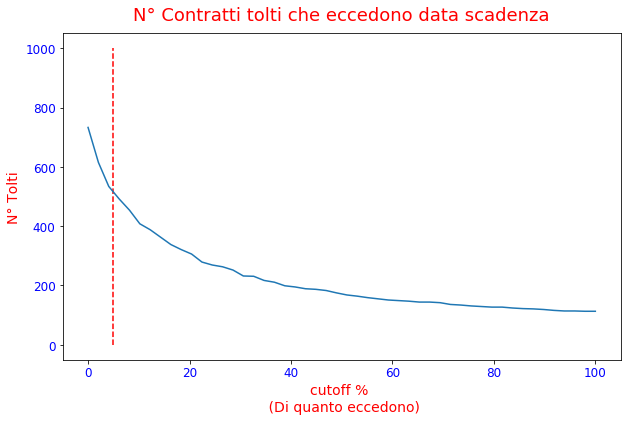

In [244]:
### Number of total contracts which exceed the agreed duration


cutoffs=[]
tolti= []
for i in np.linspace(0,100, 50):
    tolti.append(last_order_out_of_range[last_order_out_of_range['%beyond_duration'] > i].shape[0])
    cutoffs.append(i)

title_ticks_ecc('N° Contratti tolti che eccedono data scadenza', 'cutoff % \n (Di quanto eccedono)', 'N° Tolti')
plt.plot(cutoffs, tolti)

plt.vlines(x= 5, ymin= 0, ymax= 1000, colors= 'red', linestyles='dashed')

In [ ]:
out_of_range_to_drop= last_order_out_of_range[last_order_out_of_range['%beyond_duration'] > 5]['Purchase document']
out_of_range_to_drop

In [247]:
### drop the ones which exceed more than 5%

df_rolling_train_reg= df_rolling_train_reg[df_rolling_train_reg['Purchase document'].isin(out_of_range_to_drop.values)== False]
df_rolling_train_reg.shape, df_rolling_train_reg.shape[0]/10  #(416280, 44), 41628.0) per foto

((399990, 46), 39999.0)

In [248]:
df_rolling_train_reg[df_rolling_train_reg['percentage_used']>100].shape #(9772, 39)

(16285, 46)

In [249]:
last_order_out_of_range[last_order_out_of_range['%beyond_duration'] <= 5]['durata_nominale_gg'].describe()

count     221.000000
mean      645.859729
std       404.120519
min        53.000000
25%       332.000000
50%       636.000000
75%       939.000000
max      1884.000000
Name: durata_nominale_gg, dtype: float64

In [252]:
df_rolling_train_reg= df_rolling_train_reg[df_rolling_train_reg['gg rimanenti Statico'] >= 0]
df_rolling_train_reg.shape, df_rolling_train_reg.shape[0]/10 #(208140, 43), 41628.0

((399990, 46), 39999.0)

In [258]:
df_rolling_train_reg['final_utilizzato']= df_rolling_train_reg['final_utilizzato']*100/df_rolling_train_reg['Header amount']
df_rolling_train_reg.rename({'final_utilizzato': 'final_used'}, axis=1, inplace=True)

df_rolling_train_reg['final_used']= df_rolling_train_reg['final_used'].apply(lambda x: round(x,2))
df_rolling_train_reg['final_used'].describe()

count    399990.000000
mean         68.734941
std          39.845037
min           0.000000
25%          37.630000
50%          86.250000
75%         100.000000
max         920.360000
Name: final_used, dtype: float64

In [259]:
more_than_105_used= df_rolling_train_reg[df_rolling_train_reg['final_used'] > 105]['Purchase document'].unique()
df_rolling_train_reg= df_rolling_train_reg[df_rolling_train_reg['Purchase document'].isin(more_than_105_used)==False]
df_rolling_train_reg.shape  #(346950, 45)

(385500, 46)

In [260]:
df_rolling_train_reg['final_used']= df_rolling_train_reg['final_used'].apply(lambda x: 100 if x> 100 else x )
df_rolling_train_reg['final_used'].describe()

count    385500.000000
mean         66.480022
std          37.794509
min           0.000000
25%          34.740000
50%          84.850000
75%          99.920000
max         100.000000
Name: final_used, dtype: float64

### Finalizing new Features constructed: Seasonality, Acceleration in terms of number of orders and %used from of snapshot (a certain %life) in respect to the previous one.

In [118]:
for trimestre in [1,2,3,4]:  #se è stringa ('Nessun Ordine') metto tutti zero, sennò valori di ciascun trimestre
    df_rolling_train_reg['orders_trim_' + str(trimestre)]= df_rolling_train_reg['order_trimesters'].apply(lambda x:
                                 0 if type(x)== str else (0 if trimestre not in x else x[trimestre]))

df_rolling_train_reg.iloc[:5, 25:]

,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,label,final_used,Ideal Slope(euro/gg),Ideal Slope(euro/%life),True/Ideal Slope,Start Year,life%_enc,Date fully used,gg rimanenti Statico,gg rimanenti Rolling,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,years_passed,gap_trimesters,diff_n_orders,Accel_orders,diff_%used,Accel_%used
10,Nessun_ordine,-100.0,-100.0,Nessun_ordine,0%,0,-100,-100,1303,0.00,0.00,2,97.81,7521.1,0.0,NaN,2013,0,2017-02-13,1166,1166,0,0,0,0,4,0.0,0.0,0.0,0.000,0.00,0.000
11,2014-01-13 00:00:00,0.1,1.0,"{1: 1368, 2: 175}",10%,130,39,130,1303,7.68,356.08,2,97.81,7521.1,977743.0,0.8,2013,1,2017-02-13,1166,1036,1368,175,0,0,4,0.0,1.0,1543.0,1.000,7.68,1.000
12,2014-01-13 00:00:00,0.1,0.7,"{1: 1368, 2: 1227, 3: 671}",20%,260,39,260,1303,14.80,376.85,2,97.81,7521.1,1955486.0,0.7,2013,2,2017-02-13,1166,906,1368,1227,671,0,4,0.0,2.0,1723.0,1.117,7.12,0.927
13,2014-01-13 00:00:00,0.1,0.6,"{1: 1368, 3: 1281, 2: 1227, 4: 1220}",30%,390,39,390,1303,22.23,392.00,2,97.81,7521.1,2933229.0,0.7,2013,3,2017-02-13,1166,776,1368,1227,1281,1220,4,1.0,0.0,1830.0,1.062,7.43,1.044
14,2014-01-13 00:00:00,0.1,0.6,"{1: 2555, 2: 1679, 3: 1281, 4: 1221}",40%,521,39,521,1303,30.40,387.87,2,97.81,7521.1,3918493.1,0.8,2013,4,2017-02-13,1166,645,2555,1679,1281,1221,4,1.0,1.0,1640.0,0.896,8.17,1.100


In [119]:
for trimestre in [1,2,3,4]:  
    df_rolling_train_reg['orders_trim_' + str(trimestre)]= df_rolling_train_reg.apply(lambda row:
                    0 if row ['days_since_beginning'] <= 180 else row['orders_trim_' + str(trimestre)], axis=1)
    
df_rolling_train_reg.iloc[:5, 25:]

,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,label,final_used,Ideal Slope(euro/gg),Ideal Slope(euro/%life),True/Ideal Slope,Start Year,life%_enc,Date fully used,gg rimanenti Statico,gg rimanenti Rolling,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,years_passed,gap_trimesters,diff_n_orders,Accel_orders,diff_%used,Accel_%used
10,Nessun_ordine,-100.0,-100.0,Nessun_ordine,0%,0,-100,-100,1303,0.00,0.00,2,97.81,7521.1,0.0,NaN,2013,0,2017-02-13,1166,1166,0,0,0,0,4,0.0,0.0,0.0,0.000,0.00,0.000
11,2014-01-13 00:00:00,0.1,1.0,"{1: 1368, 2: 175}",10%,130,39,130,1303,7.68,356.08,2,97.81,7521.1,977743.0,0.8,2013,1,2017-02-13,1166,1036,0,0,0,0,4,0.0,1.0,1543.0,1.000,7.68,1.000
12,2014-01-13 00:00:00,0.1,0.7,"{1: 1368, 2: 1227, 3: 671}",20%,260,39,260,1303,14.80,376.85,2,97.81,7521.1,1955486.0,0.7,2013,2,2017-02-13,1166,906,1368,1227,671,0,4,0.0,2.0,1723.0,1.117,7.12,0.927
13,2014-01-13 00:00:00,0.1,0.6,"{1: 1368, 3: 1281, 2: 1227, 4: 1220}",30%,390,39,390,1303,22.23,392.00,2,97.81,7521.1,2933229.0,0.7,2013,3,2017-02-13,1166,776,1368,1227,1281,1220,4,1.0,0.0,1830.0,1.062,7.43,1.044
14,2014-01-13 00:00:00,0.1,0.6,"{1: 2555, 2: 1679, 3: 1281, 4: 1221}",40%,521,39,521,1303,30.40,387.87,2,97.81,7521.1,3918493.1,0.8,2013,4,2017-02-13,1166,645,2555,1679,1281,1221,4,1.0,1.0,1640.0,0.896,8.17,1.100


In [120]:
for trimestre in [1,2,3,4]:  
    df_rolling_train_reg['orders_trim_' + str(trimestre)]= df_rolling_train_reg.apply(lambda row: 
        round(row['orders_trim_' + str(trimestre)]/ row['num_orders'], 3) if row['num_orders']>0 else 0, axis=1)
df_rolling_train_reg.iloc[:5, 35:]

,ordini/mese,label,final_used,Ideal Slope(euro/gg),Ideal Slope(euro/%life),True/Ideal Slope,Start Year,life%_enc,Date fully used,gg rimanenti Statico,gg rimanenti Rolling,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,years_passed,gap_trimesters,diff_n_orders,Accel_orders,diff_%used,Accel_%used
10,0.00,2,97.81,7521.1,0.0,NaN,2013,0,2017-02-13,1166,1166,0.000,0.000,0.000,0.000,4,0.0,0.0,0.0,0.000,0.00,0.000
11,356.08,2,97.81,7521.1,977743.0,0.8,2013,1,2017-02-13,1166,1036,0.000,0.000,0.000,0.000,4,0.0,1.0,1543.0,1.000,7.68,1.000
12,376.85,2,97.81,7521.1,1955486.0,0.7,2013,2,2017-02-13,1166,906,0.419,0.376,0.205,0.000,4,0.0,2.0,1723.0,1.117,7.12,0.927
13,392.00,2,97.81,7521.1,2933229.0,0.7,2013,3,2017-02-13,1166,776,0.268,0.241,0.251,0.239,4,1.0,0.0,1830.0,1.062,7.43,1.044
14,387.87,2,97.81,7521.1,3918493.1,0.8,2013,4,2017-02-13,1166,645,0.379,0.249,0.190,0.181,4,1.0,1.0,1640.0,0.896,8.17,1.100


In [122]:
initial_trimester= df_rolling_train_reg['Validity start date'].apply(lambda x: x.quarter)
df_rolling_train_reg['initial_trimester']= initial_trimester

#resto divisione con 365, poi divido per 90 per fare un trimestre. Mi da quanti trimestri di differenza
gap_trimesters= (df_rolling_train_reg['days_since_beginning']%365)/90 
df_rolling_train_reg['years_passed']= (df_rolling_train_reg['days_since_beginning']/365).apply(lambda x: math.modf(x)[1] )

df_rolling_train_reg['gap_trimesters']= gap_trimesters.apply(lambda x: math.modf(x)[1] + 1 if math.modf(x)[0]>=0.9 else math.modf(x)[1])

df_rolling_train_reg['gap_trimesters'].head(3)

10    0.0
11    1.0
12    2.0
Name: gap_trimesters, dtype: float64

In [126]:
trimesters_cols= [col for col in df_rolling_train_reg.columns if col.startswith('orders_trim')]
trimesters_cols

['orders_trim_1', 'orders_trim_2', 'orders_trim_3', 'orders_trim_4']

In [127]:
def adjust_seasonality(row):
    if row['gap_trimesters'] in [0, 4] or row['years_passed']== 0:  #non faccio nulla. Anche con 4 è tutto pareggiato..
        return row 
    else: #se è 1,2 o 3
        if int(row['initial_trimester'])== 1:
            trimesters= [1,2,3]
        elif int(row['initial_trimester'])== 2:
            trimesters= [2,3,4]
        elif int(row['initial_trimester'])== 3:
            trimesters= [3,4,1]
        elif int(row['initial_trimester'])== 4:
            trimesters= [4,1,2]
        else:
            print('sbagliato: non c è nessuno di questi trimestri')
            
        for i in range(0, int(row['gap_trimesters'])): #quanti ne devo aggiungere
            col_to_adjust= ['orders_trim_' + str(trimesters[i])] 
            row[col_to_adjust]= row[col_to_adjust]* row['years_passed']/(row['years_passed']+1)  #la divido per 2
            
        return row

In [141]:
ADJUST_SEASONALITIES= False  #ci mette troppo
if ADJUST_SEASONALITIES:
    df_rolling_train_reg= df_rolling_train_reg.apply(adjust_seasonality, axis=1)
df_rolling_train_reg.head()

In [130]:
def sum_to_one(row):  #non la uso ancora
    vector= row[trimesters_cols]
    if vector.sum()== 0 or row['years_passed']== 0:
        return row
    else:
        row[trimesters_cols]= row[trimesters_cols]/row[trimesters_cols].sum()
        return row

In [131]:
df_rolling_train_reg.iloc[4:6, 45:]

,gg rimanenti Rolling,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,years_passed,gap_trimesters,diff_n_orders,Accel_orders,diff_%used,Accel_%used
14,645,0.3790,0.2490,0.190,0.0905,4,1.0,1.0,1640.0,0.896,8.17,1.100
15,515,0.1475,0.1445,0.276,0.0705,4,1.0,3.0,1936.0,1.180,7.50,0.918


In [134]:
trimesters_cols= [col for col in df_rolling_train_reg.columns if col.startswith('orders_trim')]
trimesters_cols

['orders_trim_1', 'orders_trim_2', 'orders_trim_3', 'orders_trim_4']

In [152]:
df_rolling_train_reg= df_rolling_train_reg.apply(sum_to_one, axis=1)

df_rolling_train_reg.iloc[4:6, 45:]

,gg rimanenti Rolling,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,years_passed,gap_trimesters,diff_n_orders,Accel_orders,diff_%used,Accel_%used
14,645,0.417401,0.274229,0.209251,0.099119,4,1.0,1.0,1640.0,0.896,8.17,1.100
15,515,0.231975,0.225705,0.432602,0.109718,4,1.0,3.0,1936.0,1.180,7.50,0.918


In [153]:
df_rolling_train_reg[trimesters_cols]= round(df_rolling_train_reg[trimesters_cols], 3)
df_rolling_train_reg.iloc[:5, 45:]

,gg rimanenti Rolling,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,years_passed,gap_trimesters,diff_n_orders,Accel_orders,diff_%used,Accel_%used
10,1166,0.000,0.000,0.000,0.000,4,0.0,0.0,0.0,0.000,0.00,0.000
11,1036,0.000,0.000,0.000,0.000,4,0.0,1.0,1543.0,1.000,7.68,1.000
12,906,0.419,0.376,0.205,0.000,4,0.0,2.0,1723.0,1.117,7.12,0.927
13,776,0.268,0.241,0.251,0.239,4,1.0,0.0,1830.0,1.062,7.43,1.044
14,645,0.417,0.274,0.209,0.099,4,1.0,1.0,1640.0,0.896,8.17,1.100


In [155]:
df_rolling_train_reg['diff_n_orders']= df_rolling_train_reg.groupby('Purchase document')['num_orders'].diff()
#quando c'è nan è perchè è 0% di vita, metto lo zero (il valore di num_orders)
df_rolling_train_reg['diff_n_orders'].fillna(df_rolling_train_reg['num_orders'], inplace= True) 

df_rolling_train_reg.iloc[:11, 45:]

,gg rimanenti Rolling,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,years_passed,gap_trimesters,diff_n_orders,Accel_orders,diff_%used,Accel_%used
10,1166,0.000,0.000,0.000,0.000,4,0.0,0.0,0.0,0.000,0.00,0.000
11,1036,0.000,0.000,0.000,0.000,4,0.0,1.0,1543.0,1.000,7.68,1.000
12,906,0.419,0.376,0.205,0.000,4,0.0,2.0,1723.0,1.117,7.12,0.927
13,776,0.268,0.241,0.251,0.239,4,1.0,0.0,1830.0,1.062,7.43,1.044
14,645,0.417,0.274,0.209,0.099,4,1.0,1.0,1640.0,0.896,8.17,1.100
15,515,0.232,0.226,0.433,0.110,4,1.0,3.0,1936.0,1.180,7.50,0.918
16,385,0.280,0.229,0.238,0.254,4,2.0,0.0,2266.0,1.170,9.88,1.317
17,254,0.284,0.319,0.231,0.165,4,2.0,2.0,2792.0,1.232,13.28,1.344
18,124,0.267,0.226,0.339,0.168,4,2.0,3.0,2118.0,0.759,8.93,0.672
19,-6,0.321,0.218,0.218,0.243,4,3.0,0.0,2686.0,1.268,22.34,2.502


In [158]:
df_rolling_train_reg['Accel_orders']= df_rolling_train_reg['diff_n_orders'].div(
                                        df_rolling_train_reg['diff_n_orders'].shift(1))

df_rolling_train_reg.iloc[:5, 20:]

,Professional services flag,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,label,final_used,Ideal Slope(euro/gg),Ideal Slope(euro/%life),True/Ideal Slope,Start Year,life%_enc,Date fully used,gg rimanenti Statico,gg rimanenti Rolling,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,years_passed,gap_trimesters,diff_n_orders,Accel_orders,diff_%used,Accel_%used
10,0,0,-100.000000,-100.000000,Nessun ordine,Nessun_ordine,-100.0,-100.0,Nessun_ordine,0%,0,-100,-100,1303,0.00,0.00,2,97.81,7521.1,0.0,NaN,2013,0,2017-02-13,1166,1166,0.000,0.000,0.000,0.000,4,0.0,0.0,0.0,NaN,0.00,0.000
11,0,1543,487.860998,883.572898,2014-04-14 00:00:00,2014-01-13 00:00:00,0.1,1.0,"{1: 1368, 2: 175}",10%,130,39,130,1303,7.68,356.08,2,97.81,7521.1,977743.0,0.8,2013,1,2017-02-13,1166,1036,0.000,0.000,0.000,0.000,4,0.0,1.0,1543.0,inf,7.68,1.000
12,0,3266,443.987645,740.400811,2014-08-22 00:00:00,2014-01-13 00:00:00,0.1,0.7,"{1: 1368, 2: 1227, 3: 671}",20%,260,39,260,1303,14.80,376.85,2,97.81,7521.1,1955486.0,0.7,2013,2,2017-02-13,1166,906,0.419,0.376,0.205,0.000,4,0.0,2.0,1723.0,1.116656,7.12,0.927
13,0,5096,427.457045,707.975073,2014-12-30 00:00:00,2014-01-13 00:00:00,0.1,0.6,"{1: 1368, 3: 1281, 2: 1227, 4: 1220}",30%,390,39,390,1303,22.23,392.00,2,97.81,7521.1,2933229.0,0.7,2013,3,2017-02-13,1166,776,0.268,0.241,0.251,0.239,4,1.0,0.0,1830.0,1.062101,7.43,1.044
14,0,6736,442.263432,725.352984,2015-05-10 00:00:00,2014-01-13 00:00:00,0.1,0.6,"{1: 2555, 2: 1679, 3: 1281, 4: 1221}",40%,521,39,521,1303,30.40,387.87,2,97.81,7521.1,3918493.1,0.8,2013,4,2017-02-13,1166,645,0.417,0.274,0.209,0.099,4,1.0,1.0,1640.0,0.896175,8.17,1.100


### Handling extreme cases: when life% is 0, I set 0 orders and 0 acceleration.

In [159]:
df_rolling_train_reg['Accel_orders'].fillna(0, inplace= True)
df_rolling_train_reg['Accel_orders']= df_rolling_train_reg['Accel_orders'].apply(lambda x: 1 if np.isinf(x)== True else round(x,3))

df_rolling_train_reg['Accel_orders'].iloc[:5]

10    0.000
11    1.000
12    1.117
13    1.062
14    0.896
Name: Accel_orders, dtype: float64

In [160]:
df_rolling_train_reg['diff_%used']= df_rolling_train_reg.groupby('Purchase document')['percentage_used'].diff()
#quando c'è nan è perchè è 0% di vita, metto lo zero (il valore di num_orders)
df_rolling_train_reg['diff_%used'].fillna(df_rolling_train_reg['num_orders'], inplace= True) 

df_rolling_train_reg.iloc[:5, 45:]

,gg rimanenti Rolling,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,years_passed,gap_trimesters,diff_n_orders,Accel_orders,diff_%used,Accel_%used
10,1166,0.000,0.000,0.000,0.000,4,0.0,0.0,0.0,0.000,0.00,0.000
11,1036,0.000,0.000,0.000,0.000,4,0.0,1.0,1543.0,1.000,7.68,1.000
12,906,0.419,0.376,0.205,0.000,4,0.0,2.0,1723.0,1.117,7.12,0.927
13,776,0.268,0.241,0.251,0.239,4,1.0,0.0,1830.0,1.062,7.43,1.044
14,645,0.417,0.274,0.209,0.099,4,1.0,1.0,1640.0,0.896,8.17,1.100


In [161]:
df_rolling_train_reg['Accel_%used']= df_rolling_train_reg['diff_%used'].div(df_rolling_train_reg['diff_%used'].shift(1))
df_rolling_train_reg['Accel_%used'].fillna(0, inplace= True)
df_rolling_train_reg['Accel_%used']= df_rolling_train_reg['Accel_%used'].apply(lambda x: 1 if np.isinf(x)== True else round(x,3))
df_rolling_train_reg.iloc[:5, 45:]

,gg rimanenti Rolling,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,years_passed,gap_trimesters,diff_n_orders,Accel_orders,diff_%used,Accel_%used
10,1166,0.000,0.000,0.000,0.000,4,0.0,0.0,0.0,0.000,0.00,0.000
11,1036,0.000,0.000,0.000,0.000,4,0.0,1.0,1543.0,1.000,7.68,1.000
12,906,0.419,0.376,0.205,0.000,4,0.0,2.0,1723.0,1.117,7.12,0.927
13,776,0.268,0.241,0.251,0.239,4,1.0,0.0,1830.0,1.062,7.43,1.044
14,645,0.417,0.274,0.209,0.099,4,1.0,1.0,1640.0,0.896,8.17,1.100


In [211]:
### Dropping columns which were temporary, useful to build the final ones

cols_to_drop= ['Active contract flag', 'gg rimanenti Rolling', 'order_trimesters',  'Date fully used', 'Start Year', 
               'Ideal Slope(euro/%life)', 'Ideal Slope(euro/gg)', 'first_order_date', 'last_order_date', 
               'Validity start date', 'Validity end date', 'years_passed', 'gap_trimesters', 'diff_n_orders',
                 'diff_%used', 'Start Year' 'life%_enc']

In [166]:
df_rolling_train_reg['True/Ideal Slope'].fillna(0, inplace= True)

In [212]:
binary_cols= ['Variant code', 'Contract Type' , 'Main material group qualification flag', 'Professional services flag']
fake_numerics= ['label', 'final_used','gg rimanenti Statico'] + binary_cols
continuous_cols= [col for col in df_rolling_train_reg.select_dtypes(include= 'number').columns if col not in fake_numerics]

for col in continuous_cols:
    df_rolling_train_reg[col]= df_rolling_train_reg[col].apply(lambda x: round(x,3))

In [168]:
df_rolling_train_reg.drop(cols_to_drop, axis=1, inplace=True, errors= 'ignore')
df_rolling_train_reg.shape #(385500, 42)

(385500, 42)

In [310]:
def rate_full_life(row): 
    try:
        if row['num_orders']==0:   #se non ho effettuato ordini
            return 0  
        else:
            rate= row['num_orders']/row['durata_nominale_gg']
            #return round(rate*100,2)
            return round(rate*30,2)   #non lo voglio in %: se ho fatto 15 ordine in un mese, voglio 0.5
    except:
        return 'NOT DEFINED'

In [ ]:
aggregated_full_life['durata_nominale_gg']= aggregated_full_life.apply(durata_nominale, axis=1) #durata_nominale
aggregated_full_life['ordini/mese']= aggregated_full_life.apply(rate_full_life, axis=1) #creato rate
aggregated_full_life['days_til_first_order']= aggregated_full_life.apply(giorni_1st_order, axis=1)#creo days til_1st_ord

In [82]:
unici_statico= df_rolling_train_reg['Purchase document'].unique()

len(unici_statico)  #38550

38550

In [316]:
final_full_life= aggregated_full_life[aggregated_full_life['Purchase document'].isin(unici_statico)]
for col in ['durata_nominale_gg', 'ordini/mese','days_til_first_order']:
    if col== 'ordini/mese':
        final_full_life[col]= final_full_life[col].astype(float)
    try:
        final_full_life[col]= final_full_life[col].astype(int)
    except:
        pass
final_full_life.shape

(38550, 36)

## Projecting regression target for contracts not fully consumed: given their slope until the end date, calculating the theoretical date in which it would be consumed.

In [121]:
to_interpolate= final_full_life[final_full_life['label'] != 2]
to_interpolate.shape

(21499, 37)

In [125]:
temp= to_interpolate[to_interpolate['header_utilizzato']> 500]

In [126]:
def project_target(row):
    obiettivo= 0.9* row['Header amount']
    utilizzato= row['header_utilizzato']
    utilizzato_giornaliero= row['header_utilizzato']/ row['durata_nominale_gg']
    if utilizzato_giornaliero > 0.001:
        giorni_mancanti= round((obiettivo- utilizzato)/ utilizzato_giornaliero, 2)
        giorni_totali= giorni_mancanti + row['durata_nominale_gg']
        return round(giorni_totali/ row['durata_nominale_gg'], 2)
    
    else:
        return 10000

In [127]:
temp['interpolated_target']=  temp.apply(project_target, axis=1 )
temp.head(3)

,Purchase document,Validity start date,Validity end date,Global Business line,Contract,Purchase document type,Job type,Document date,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,label,ordini/mese,days_til_first_order,durata_nominale_gg,gg rimanenti Statico,interpolated_target
2,EL\5800012593,2012-07-01 00:00:00,2017-02-03 00:00:00,M&S,nd,Z,S,2012-06-28,0000000000,CHL,Y,6309437.01,SLVI01,N,74424,N,S,Estero,CL,CHM,CL,nd,N,N,5520866.66,4309.0,1281.240812,2080.212083,2016-12-30,2012-07-03,0.381295,0.951290,1,77,2,1678,1728,1.03
3,DR\9600000478,2013-12-05 00:00:00,2017-12-04 00:00:00,GIN,nd,Z,F,2013-12-03,nd,ROP,Y,6101934.24,FCCU01,N,55806,N,S,Estero,RO,ROI,RO,nd,N,N,3906334.16,4.0,976583.540000,504239.540330,2017-11-03,2013-12-13,357.250000,302.876625,1,0,8,1460,2058,1.41
4,CR\8400056435,2013-01-01 00:00:00,2015-07-31 00:00:00,M&S,nd,Z,S,2012-12-28,0000000000,ITA,Y,5250000.00,SPPR03,N,46476,Y,R,Centro,IT,AMC,IT,nd,N,N,1513528.00,22.0,68796.727273,56588.637622,2015-07-31,2013-02-06,42.772727,19.311807,1,0,36,941,2935,3.12


In [128]:
temp['interpolated_target'].describe(percentiles= [0.05, 0.5, 0.95])

count    16111.000000
mean         4.456436
std         18.738048
min          1.000000
5%           1.020000
50%          1.480000
95%         13.930000
max        987.190000
Name: interpolated_target, dtype: float64

In [129]:
#### Projecting it, setting maximum 10 times higher than agred nominal duration
maximum_target= 10

to_interpolate['projected_target']=  to_interpolate.apply(project_target, axis=1 )
to_interpolate['projected_target']= to_interpolate['projected_target'].apply(lambda x: maximum_target if x>10 else x)
to_interpolate['projected_target'].describe(percentiles= [0.1, 0.25, 0.5, 0.75, 0.9])

to_interpolate['gg_projected_Statico']= (to_interpolate['durata_nominale_gg']*to_interpolate['projected_target']).apply(
                                                                                        lambda x: int(x))

to_interpolate['projected_target']= to_interpolate['projected_target'].apply(lambda x: round(x*100,2))

In [ ]:
diz_projections= dict(zip(to_interpolate['Purchase document'], to_interpolate['gg_projected_Statico']))
diz_projections

In [218]:
df_rolling_train_reg.drop(cols_to_drop, axis=1, inplace=True, errors= 'ignore')
df_rolling_train_reg.shape #(385500, 42)

(385500, 42)

In [63]:
df_rolling_train_reg['gg rimanenti Statico']= df_rolling_train_reg.apply(lambda row:
        row['gg rimanenti Statico'] if row['label']== 2 else diz_projections[row['Purchase document']], axis=1)

df_rolling_train_reg.sample(3)

,Purchase document,Validity start date,Validity end date,Global Business line,Purchase document type,Job type,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,order_trimesters,life%,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,label,final_used,Ideal Slope(euro/gg),Ideal Slope(euro/%life),True/Ideal Slope,Start Year,life%_enc,Date fully used,gg rimanenti Statico,gg rimanenti Rolling,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,years_passed,gap_trimesters,diff_n_orders,Accel_orders,diff_%used,Accel_%used
2607,EL\5800011704,2012-03-23,2014-03-31,GIN,Z,F,0,COL,0,111401.80,FESO13,N,67366,1,S,Estero,CO,COI,CO,nd,0,9,6108.356667,5911.374196,2013-07-08 00:00:00,2012-05-14 00:00:00,52.4,26.4,"{3: 3, 2: 3, 4: 2, 1: 1}",70%,516,52,472,738,49.35,0.52,1,81.68,151.0,77916.0,0.7,2012,7,2014-03-31,811,222,0.059,0.353,0.353,0.235,1,1.0,1.0,2.0,1.0,16.36,1.0
589292,W1\4600012908,2017-10-01,2018-12-31,GTG,A,L,0,GGX,0,1920000.00,SPPT15,N,SK2023183800,1,#,Estero,SK,GSL,SK,nd,0,2,258975.490000,348155.068725,2017-12-27 00:00:00,2017-12-20 00:00:00,43.5,36.5,{4: 2},20%,91,80,87,456,26.98,0.66,1,77.41,4210.5,383155.5,1.4,2017,2,2018-12-31,528,365,0.000,0.000,0.000,0.000,4,0.0,1.0,2.0,1.0,26.98,1.0
653435,DR\7700000715,2014-07-02,2014-11-02,GIN,T,L,0,ROP,1,21413.43,LELE05,N,46963,0,S,Estero,RO,ROI,RO,nd,0,1,21767.550000,-50.000000,2014-07-07 00:00:00,2014-07-07 00:00:00,5.0,-50.0,{3: 1},50%,61,5,5,123,101.65,0.49,2,100.00,174.1,10620.1,2.0,2014,5,2014-07-07,5,-56,0.000,0.000,0.000,0.000,3,0.0,0.0,0.0,0.0,0.00,0.0


In [66]:
diz_projections.update(zip(df_rolling_train_reg[df_rolling_train_reg['label']==2]['Purchase document'],
                      df_rolling_train_reg[df_rolling_train_reg['label']==2]['gg rimanenti Statico']))

len(diz_projections)

38550

In [132]:
final_full_life['gg rimanenti Statico']= final_full_life['Purchase document'].map(diz_projections)
final_full_life.sample(3)

,Purchase document,Validity start date,Validity end date,Global Business line,Contract,Purchase document type,Job type,Document date,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,Active contract flag,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,Energy convey flag,header_utilizzato,num_orders,avg_importo_ordine,std_importo_ordine,last_order_date,first_order_date,avg_order_intervals,std_order_intervals,label,ordini/mese,days_til_first_order,durata_nominale_gg,gg rimanenti Statico
22227,EL\5600016054,2016-02-23 00:00:00,2017-05-31 00:00:00,GIN,nd,Z,F,2016-05-24,0000000000,BRA,Y,3483806.00,FECA16,N,8192,N,S,Nord,IT,BRI,BR,nd,N,N,3155657.20,2.0,1.577829e+06,628006.846795,2016-12-26,2016-06-10,153.500000,64.346717,2,0,108,463,307
45641,G4\8400112036,2017-09-01 00:00:00,2017-12-31 00:00:00,GTG,nd,A,L,2017-09-05,0000000000,IBE,Y,71201.00,LEII09,N,140562,N,S,Estero,ES,IBO,ES,S_H_NO,N,N,71201.00,1.0,7.120100e+04,NaN,2017-09-05,2017-09-05,4.000000,NaN,2,0,4,121,4
2652,EL\5900003433,2013-08-01 00:00:00,2016-12-31 00:00:00,M&S,nd,Z,S,2013-08-13,nd,CHL,Y,440897.62,SLTR21,N,64831,N,S,Estero,CO,CHM,CL,nd,N,N,393615.56,79.0,4.982475e+03,5769.693281,2016-12-12,2013-08-13,15.556962,33.440244,1,1,12,1248,1260


In [291]:
#df_statico= df_rolling_train_reg.groupby('Purchase document').first()
df_statico= final_full_life.copy().set_index('Purchase document')
df_statico['label'] = df_statico['label'].map({0:0, 1:0, 2:1})
df_statico.shape  #(38550, 41)

(38550, 36)

In [292]:
diz_final_used= dict(zip(df_rolling_train_reg['Purchase document'], df_rolling_train_reg['final_used']))
print(len(diz_final_used))

df_statico['final_used']= df_statico.index.map(diz_final_used)

38550

In [296]:
cardinalita_statico= {}
for col in df_statico.select_dtypes(include=object).columns:
    cardinalita_statico[col]= df_statico.select_dtypes(include=object)[col].nunique()
cardinalita_statico= pd.Series(cardinalita_statico)
cardinalita_statico= cardinalita_statico.sort_values(ascending=False)
#d= d.drop('life%')
cardinalita_statico= pd.DataFrame(cardinalita_statico, columns= ['Cadinality'])
cardinalita_statico= cardinalita_statico.drop(['Purchase document','Main Requesting unit', 'label', 'Validity end date',
                         'Validity start date', 'Contract'], errors='ignore').iloc[:-2]

cardinalita_statico

,Cadinality
VMD Code,12336
QMG Code,880
days_til_first_order,873
Purchase Unit Code,76
Country Code,60
Purchase Country Code,13
Global Purchase Unit Code,13
Global Business line,8
Geographical Area,5
Supplier Type Code,5


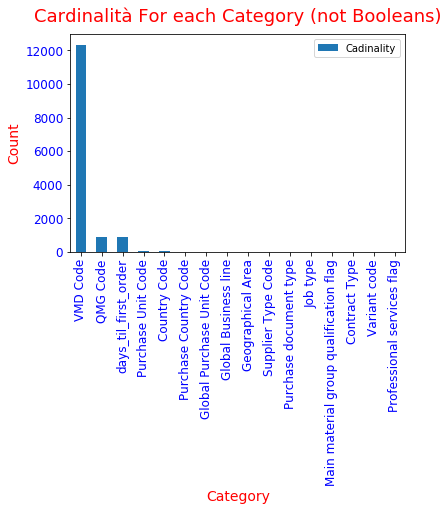

In [297]:
cardinalita_statico.plot(kind='bar')
title_ticks_ecc('Cardinalità For each Category (not Booleans)', 'Category', 'Count', new_fig= False)

### Cutting the contracts if and when at a certain life% they are already fully consumed (>90%)

In [219]:
df_rolling_clean_class= df_rolling_train_reg[df_rolling_train_reg['percentage_used']< 90]
df_rolling_clean_class.shape, df_rolling_clean_class['Purchase document'].nunique() #((304564, 42), 37797 unici),  distribuiti diversamente per ogni fotografia..

((304564, 42), 37797)

#### Regression problem to estimate remaining lifetime is done only on contracts with label=2 (the consumed ones)

In [221]:
df_rolling_clean_reg= df_rolling_clean_class[df_rolling_clean_class['label']==2]
df_rolling_clean_reg.shape #(89596, 42), distribuiti diversamente per ogni fotografia..

(89596, 42)

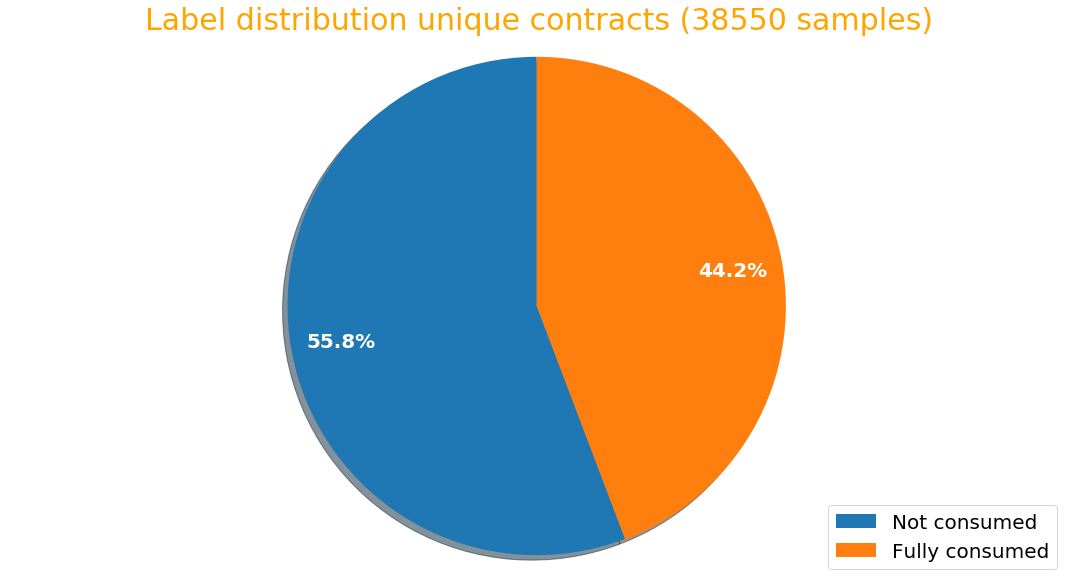

In [298]:
sums = all_unique['label'].value_counts()
sums.index= sums.index.map({1: 'Fully consumed', 0: 'Not consumed'})
#plt.figure(figsize=(20,10))

fig1, ax1 = plt.subplots(figsize= (10,10))
plt.title("Label distribution unique contracts (38550 samples)", fontsize= 30, color='orange')
_, _, autotexts = pie(sums,labels= sums.index, center= (1,1), autopct='%1.1f%%', pctdistance=0.8,
        shadow=True, startangle=90, textprops={'fontsize': 20, 'color':"white", 'weight':'bold'}, labeldistance= 1.5)
                                                                    #metto color='black se voglio mostrarlo
for autotext in autotexts:
    autotext.set_color('white')
    
"""ax1.pie(sums, labels=sums.index, center= (1,1), autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 20, 'color':"black"}, labeldistance= 1.0)"""
ax1.axis('equal')
ax1.legend(loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=20)
plt.setp(autotexts, weight="bold")
plt.show()

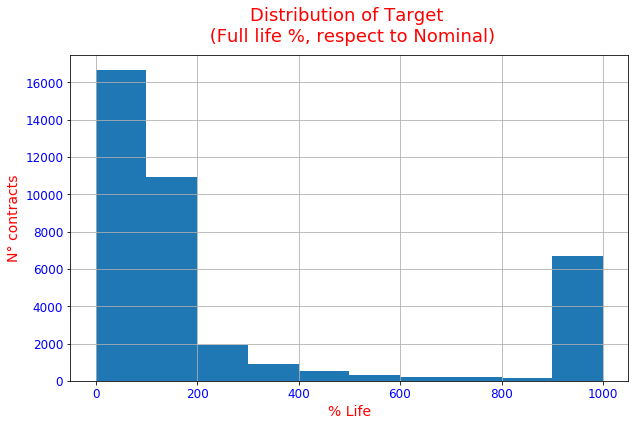

In [151]:
title_ticks_ecc('Distribution of Target \n (Full life %, respect to Nominal)', '% Life', 'N° contracts')
(df_statico['gg rimanenti Statico']*100/df_statico['durata_nominale_gg']).hist()
#sns.distplot(df_statico['gg rimanenti Statico']*100/df_statico['durata_nominale_gg'])

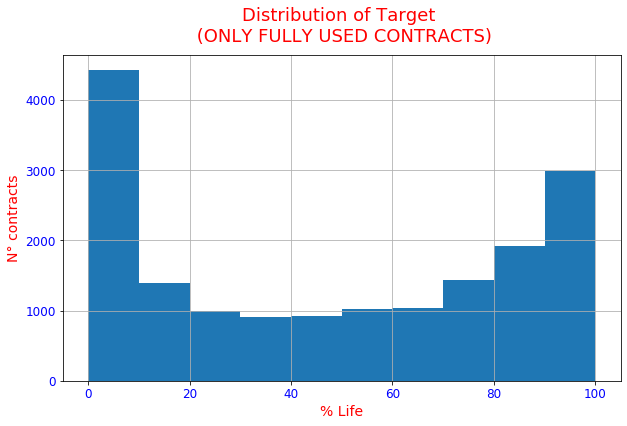

In [152]:
title_ticks_ecc('Distribution of Target \n (ONLY FULLY USED CONTRACTS)', '% Life', 'N° contracts')
(fully_used['gg rimanenti Statico']*100/fully_used['durata_nominale_gg']).hist()
#sns.distplot(df_statico['gg rimanenti Statico']*100/df_statico['durata_nominale_gg'])

#### Analysis of contracts fully consumed at the 1st order

In [182]:
vita_1st_order= only_orders[only_orders['days_til_first_order']>=0 ]
vita_1st_order= vita_1st_order['days_til_first_order']/vita_1st_order['durata_nominale_gg']
vita_1st_order= vita_1st_order.apply(lambda x: round(x*100,2))

In [302]:
esauriti_1st_order= only_orders[only_orders.index.isin(used_at_first_order.index)][['days_til_first_order', 'durata_nominale_gg']]

vita_1st_order_che_esaurisce=esauriti_1st_order['days_til_first_order']/esauriti_1st_order['durata_nominale_gg']
vita_1st_order_che_esaurisce= vita_1st_order_che_esaurisce.apply(lambda x: round(x*100,2))

In [414]:
only_orders.shape, esauriti_1st_order.shape,  

((33532, 3), (7557, 2))

In [400]:
print('Tra i {} con almeno un ordine, {} sono gia esauriti al 1°, ovvero il {}%'.format(only_orders.shape[0],
        esauriti_1st_order.shape[0], round(100*esauriti_1st_order.shape[0]/only_orders.shape[0], 2)))

Tra i 33532 con almeno un ordine, 7557 sono gia esauriti al 1°, ovvero il 22.54%


Text(0, 0.5, '% life')

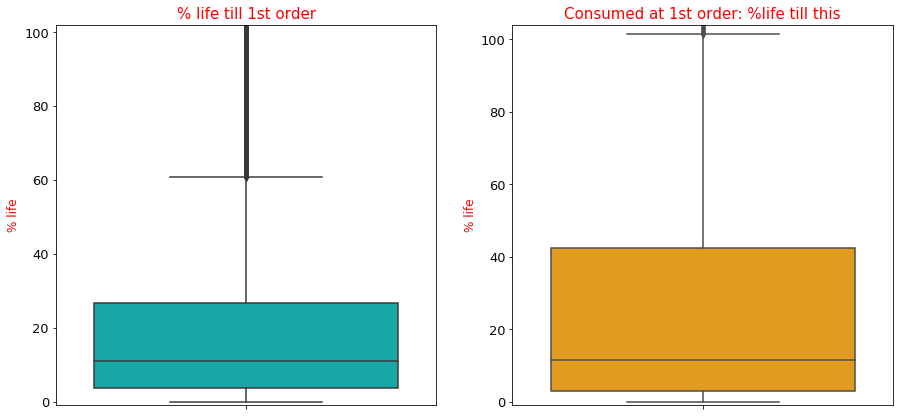

In [305]:
"""% di vita negativa è perchè alcuni hanno days_till_last_order = -1, normale"""

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title('% life till 1st order', color= 'red', fontsize= 15)
sns.boxplot(vita_1st_order,  orient='v', color='c')
plt.yticks(color='black', alpha=10, fontsize=13)
plt.ylim(-1, 102)
plt.ylabel('% life', color='red', fontsize= 12)

plt.subplot(1,2,2)
plt.title('Consumed at 1st order: %life till this', color= 'red', fontsize= 15)
sns.boxplot(vita_1st_order_che_esaurisce,  orient='v', color='orange')
plt.ylim(-1, 104)
plt.yticks(color='black', alpha=10, fontsize=13)
plt.ylabel('% life', color='red', fontsize= 12)

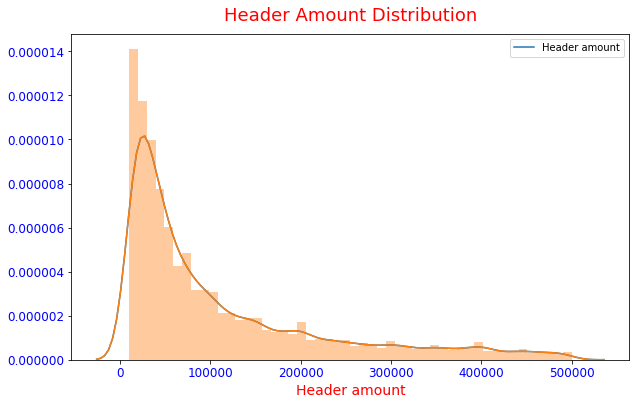

In [308]:
title_ticks_ecc('Header Amount Distribution', '', '')
sns.kdeplot(df_statico[df_statico['Header amount']< 500000]['Header amount'] )
sns.distplot(df_statico[df_statico['Header amount']< 500000]['Header amount']) #.hist()

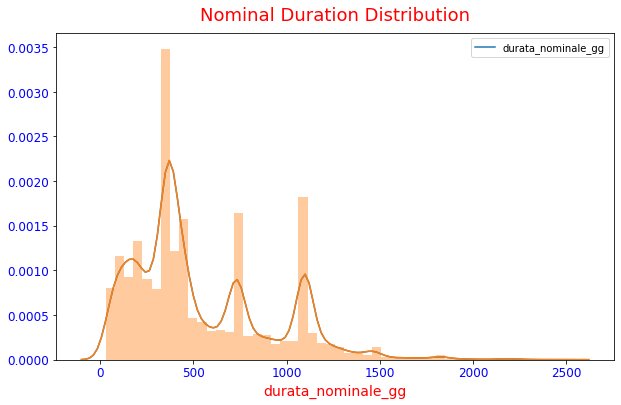

In [309]:
title_ticks_ecc('Nominal Duration Distribution', '', '')
sns.kdeplot(df_statico['durata_nominale_gg'] )
sns.distplot(df_statico['durata_nominale_gg']) #.hist()

In [324]:
def aggregated_descriptive(x):
    #'header_utilizzato', 'num_orders', 'total_days_passed'
    d = {}
    d['N_Samples'] = len(x)
    d['Mean_Target'] = x['label'].mean()
    d['Std_Target'] = x['label'].std()
    
    return pd.Series(d)

In [358]:
prova= df_statico.groupby(["Global Business line"]).apply(aggregated_descriptive).sort_values(by= 'N_Samples', ascending= False )

In [359]:
prova['N_Samples']= ((prova['N_Samples']).cumsum())/df_statico.shape[0]
prova= prova.rename({'N_Samples': 'Cum_%_samples'}, axis=1)
prova

,Cum_%_samples,Mean_Target,Std_Target
Global Business line,,,
M&S,0.349780,0.336176,0.472418
GIN,0.634449,0.475579,0.499426
GTG,0.797484,0.563087,0.496044
GRE,0.916031,0.463457,0.498717
GIT,0.983113,0.568059,0.495442
GES,0.996783,0.292220,0.455215
LBS,0.999896,0.150000,0.358569
GTR,1.000000,0.250000,0.500000


### Target distribution in respect to single categories

In [360]:
frequency_class1= 0.442
n_to_show= 4

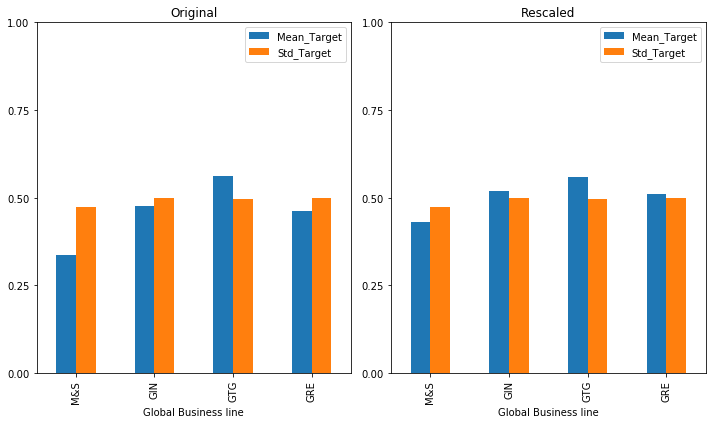

In [361]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
prova= prova.iloc[:n_to_show][['Mean_Target', 'Std_Target']]

prova.plot(ax=ax[0], title='Original', kind= 'bar')
ax[0].set_ylim(0,1) 
ax[0].set_yticks([0, 0.25, 0.5, 0.75, 1])  

prova['Mean_Target'] = ((100*prova['Mean_Target']/ frequency_class1)/ (1+ prova['Mean_Target']/ frequency_class1))/100
prova.plot(ax=ax[1], title='Rescaled', kind= 'bar')
ax[1].set_ylim(0,1)
ax[1].set_yticks([0, 0.25, 0.5, 0.75, 1])  

"""prova.plot(ax=ax[1][0],
        title='Bottom left', kind= 'bar') #deve avere subplots( 2,2)"""

plt.tight_layout()

In [362]:
cols_to_drop= cols_to_drop + ['Energy convey flag', 'Global Purchase Unit Code', 'Country Code','Purchase Country Code' ]

In [366]:
categorical_feats= [col for col in df_statico.select_dtypes(include= object).columns if col not in cols_to_drop+ 
                                                    ['days_til_first_order', 'Contract', 'Main Requesting unit']]
categorical_feats

['Global Business line',
 'Purchase document type',
 'Job type',
 'Variant code',
 'Contract Type',
 'QMG Code',
 'VMD Code',
 'Main material group qualification flag',
 'Supplier Type Code',
 'Geographical Area',
 'Purchase Unit Code',
 'Professional services flag']

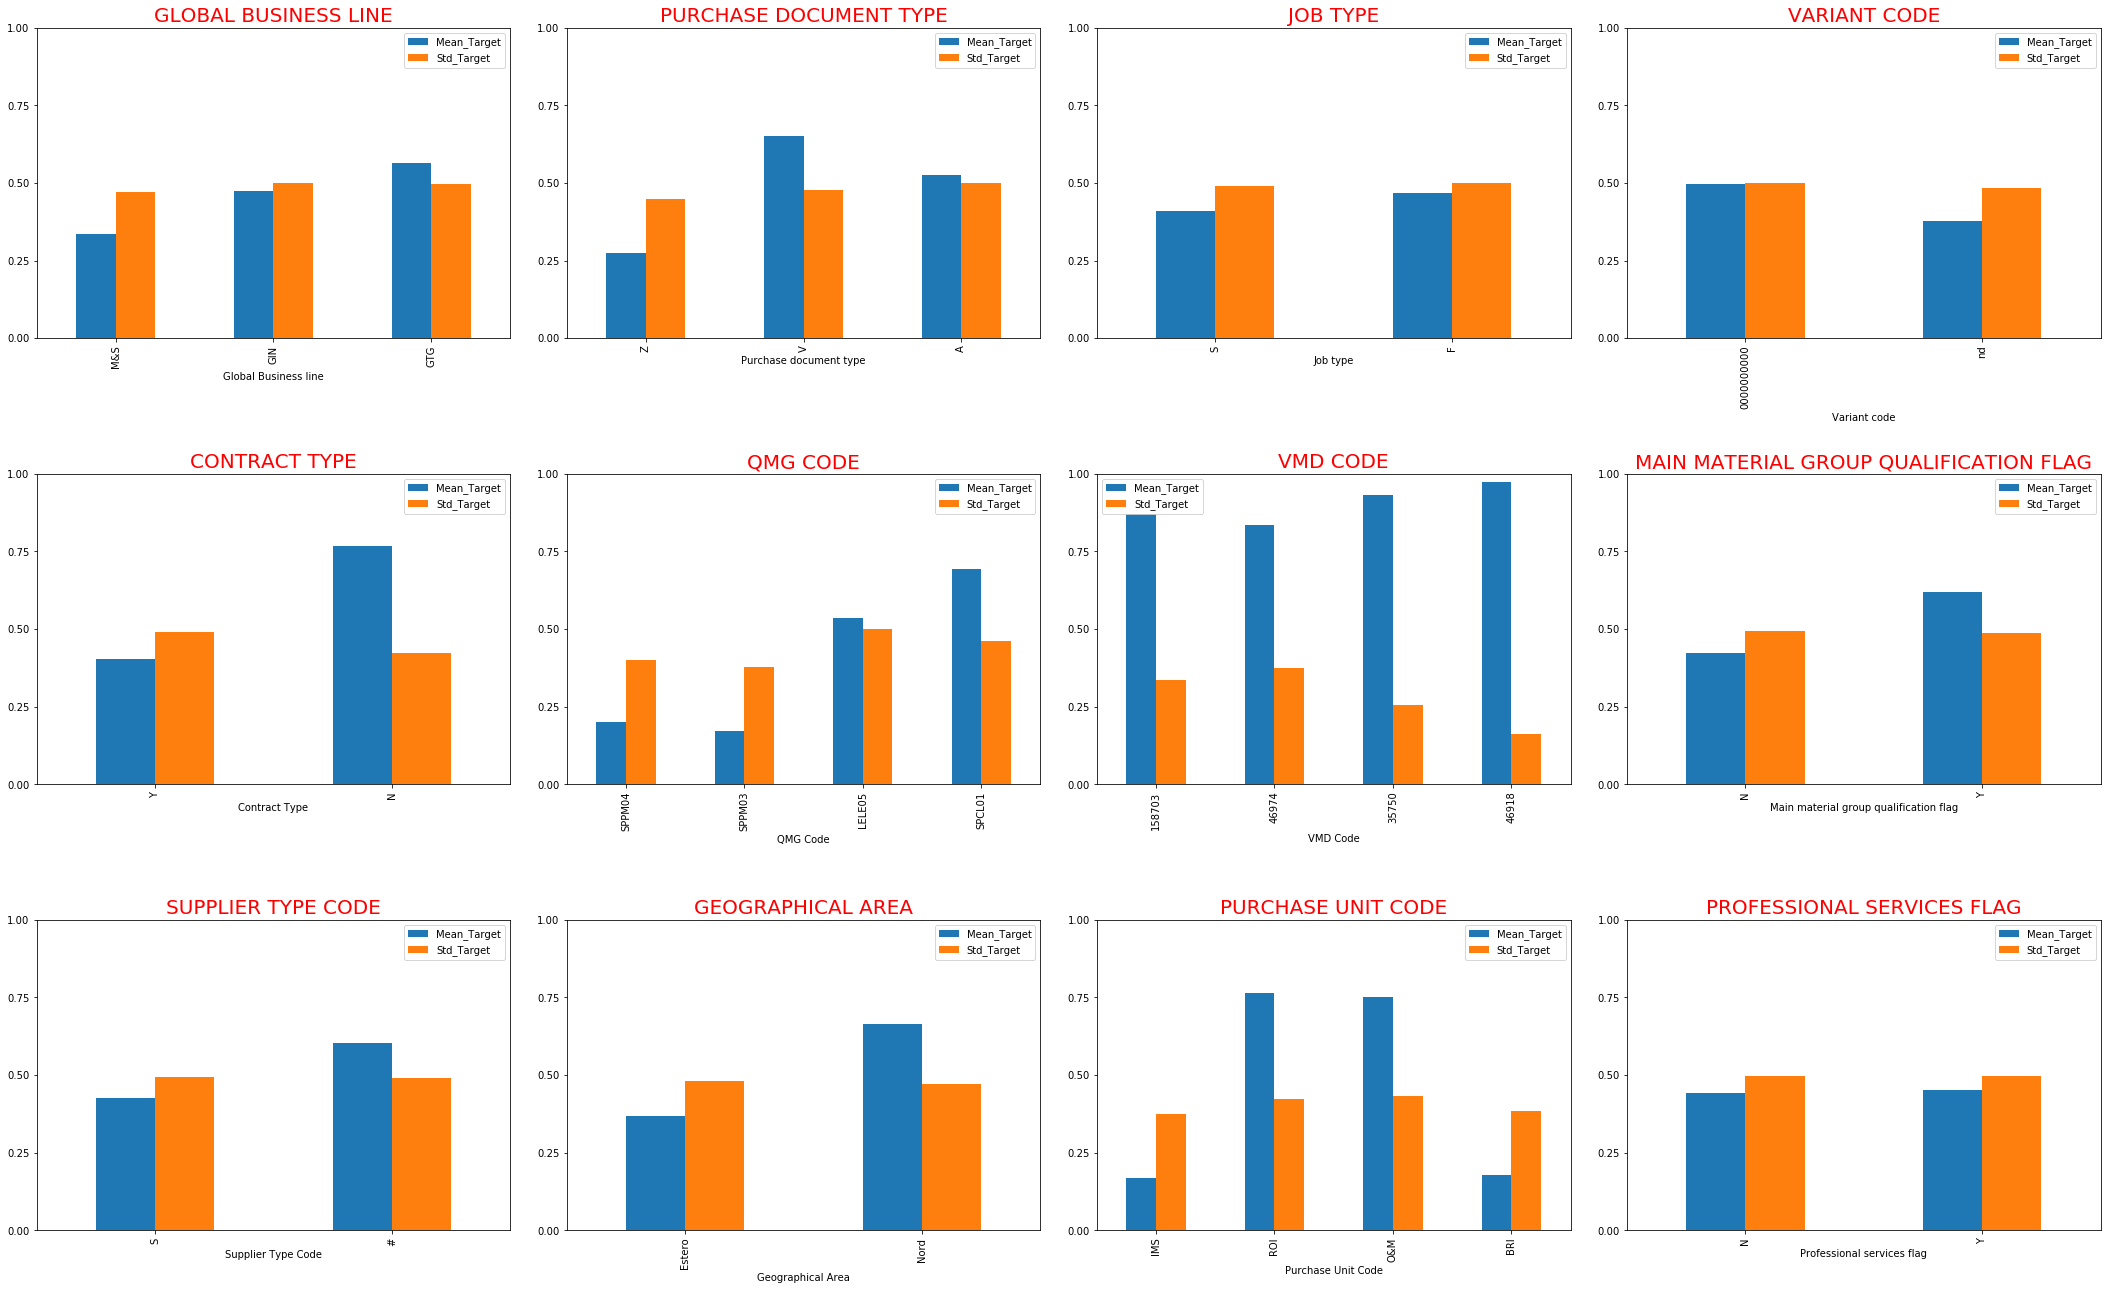

In [448]:
n_cols= 4
n_rows= int(np.ceil(len(categorical_feats)/n_cols))
n_to_show= 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(30,18))
threshold_samples= 0.9
proportion_class1= float(0.063)

iteraz= -1
for i in range(n_rows):
    for j in range(n_cols):
        iteraz+=1
        try: 
            feat= categorical_feats[iteraz]
            grouped= df_statico.groupby([feat]).apply(aggregated_descriptive).sort_values(by= 'N_Samples', ascending= False )
            grouped['N_Samples']= ((grouped['N_Samples']).cumsum())/df_statico.shape[0]
            grouped= grouped.rename({'N_Samples': 'Cum_%_samples'}, axis=1)
            
            len_grouped= len(grouped[grouped['Cum_%_samples'] <= threshold_samples])
            #print('Feat: {}, len: {}'.format(feat, len_grouped))
            
            # if the cumulative % of samples of the first two categories is higher than 80%
            if len_grouped> n_to_show: 
                grouped= grouped[grouped['Cum_%_samples'] <= threshold_samples].iloc[:n_to_show]
            else: 
                if len_grouped <= 1: #se gia con 1 classe lo supera, ne mostro comunque 2
                    grouped= grouped.iloc[:2]
                else:
                    grouped= grouped[grouped['Cum_%_samples'] <= threshold_samples]

            #grouped['Mean_Target']= ((100*grouped['Mean_Target']/ proportion_class1)/ (1+ grouped['Mean_Target']/ proportion_class1))/100
            grouped[['Mean_Target', 'Std_Target']].plot(ax=ax[i][j],  kind= 'bar', title='{}'.format(feat))
            ax[i][j].set_ylim(0,1)  
            ax[i][j].set_yticks([0, 0.25, 0.5, 0.75, 1]) 
            ax[i][j].set_title(feat.upper(), color= 'red', fontdict = {'fontsize': 20})
        
        except:
            print('Error for feature',feat)
            pass
        
        

plt.tight_layout(pad=1, h_pad=3.0) #w_pad=0.5
plt.savefig('Categorical_Plots.PNG')

<Figure size 1080x1080 with 0 Axes>

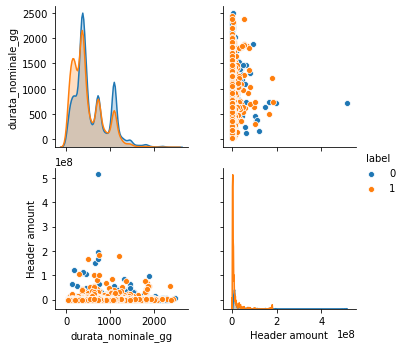

In [385]:
plt.figure(figsize=(15,15))
sns.pairplot(data= df_statico[['durata_nominale_gg', 'Header amount', 'label']] , hue= 'label', vars= ['durata_nominale_gg', 'Header amount']) 
plt.savefig('Continuous_Plots.PNG')

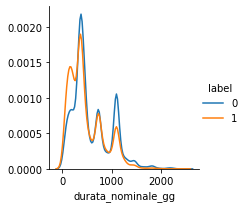

In [392]:
def distplot_with_hue(data=None, x=None, hue=None, row=None, col=None, legend=True, plot_type= sns.distplot, **kwargs):
    _, bins = np.histogram(data[x].dropna())
    g = sns.FacetGrid(data, hue=hue, row=row, col=col)
    g.map(plot_type, x, **kwargs)
    if legend and (hue is not None) and (hue not in [x, row, col]):
        g.add_legend(title=hue) 
distplot_with_hue(data= df_statico, x='durata_nominale_gg', hue='label', hist=False)

In [443]:
perc_avg_intervals= only_orders.apply(
    lambda row: round(row['avg_order_intervals']*100/row['durata_nominale_gg'],2) if row['avg_order_intervals']>0 else -1, axis=1)


perc_std_intervals= only_orders.apply(
    lambda row: round(row['std_order_intervals']*100/row['avg_order_intervals'],2) if row['avg_order_intervals']>0 else -1, axis=1)

(-10, 300)

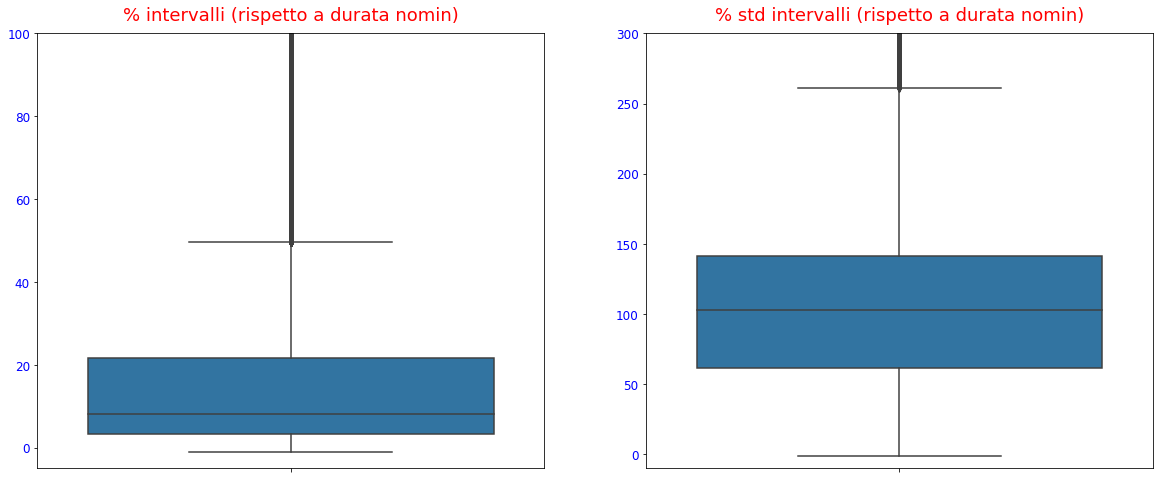

In [447]:
plt.figure(figsize=(20, 8))

y= [str(col)+'%' for col in np.arange(0, 100, 10)]

plt.subplot(1, 2, 1)
title_ticks_ecc('% intervalli (rispetto a durata nomin)','','', new_fig=False)
sns.boxplot(perc_avg_intervals, orient='v')
plt.ylim(-5, 100)
#plt.yticks(np.arange(0, 50, 10))

plt.subplot(1, 2, 2)
title_ticks_ecc('% std intervalli (rispetto a durata nomin)','','', new_fig=False)
sns.boxplot(perc_std_intervals, orient='v')
plt.ylim(-10, 300)
#plt.yticks(np.arange(0, 50, 10))

Text(0, 0.5, 'TARGET (= LIFE TIME%)')

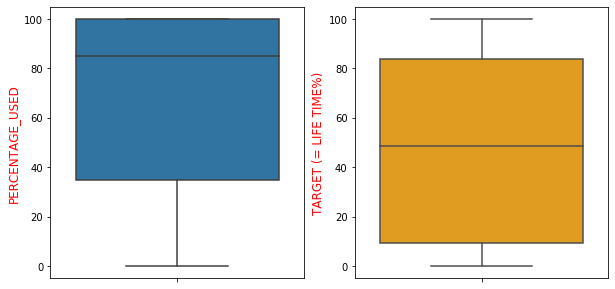

In [407]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sns.boxplot(df_statico['final_used'],  orient='v')
plt.ylabel('PERCENTAGE_USED', color='red', fontsize= 12)

plt.subplot(1,2,2)
sns.boxplot(round(100*fully_used['gg rimanenti Statico']/fully_used['durata_nominale_gg'],4),  orient='v', color='orange')
plt.ylabel('TARGET (= LIFE TIME%)', color='red', fontsize= 12)

#### Export df_rolling_clean per class e reg

In [388]:
df_rolling_clean_class.to_pickle('../../dati_enel_v3/10_snapshots/df_rolling_clean_class_10snap.pk1')
df_rolling_clean_reg.to_pickle('../../dati_enel_v3/10_snapshots/df_rolling_clean_reg_10snap.pk1')

df_rolling_clean_class.shape, df_rolling_clean_reg.shape #(304564, 42), (89596, 42), REGRESSIONE SOLO SU LABEL= 2

In [389]:
df_rolling_clean_reg.head(15)

,Purchase document,Global Business line,Purchase document type,Job type,Variant code,Global Purchase Unit Code,Contract Type,Header amount,QMG Code,VMD Code,Main material group qualification flag,Supplier Type Code,Geographical Area,Country Code,Purchase Unit Code,Purchase Country Code,Main Requesting unit,Professional services flag,num_orders,avg_importo_ordine,std_importo_ordine,avg_order_intervals,std_order_intervals,life%,days_since_beginning,days_til_first_order,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,label,final_used,True/Ideal Slope,life%_enc,gg rimanenti Statico,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,Accel_orders,Accel_%used
10,DI\8400060305,GIN,Z,F,1,ITA,0,9800000.00,FEMI01,10749,0,S,Nord,IT,APR,IT,nd,0,0,-100.000,-100.000,-100.0,-100.0,0%,0,-100,-100,1303,0.00,0.00,2,97.81,NaN,0,1166,0.000,0.000,0.000,0.000,4,0.000,0.000
11,DI\8400060305,GIN,Z,F,1,ITA,0,9800000.00,FEMI01,10749,0,S,Nord,IT,APR,IT,nd,0,1543,487.861,883.573,0.1,1.0,10%,130,39,130,1303,7.68,356.08,2,97.81,0.8,1,1166,0.000,0.000,0.000,0.000,4,1.000,1.000
12,DI\8400060305,GIN,Z,F,1,ITA,0,9800000.00,FEMI01,10749,0,S,Nord,IT,APR,IT,nd,0,3266,443.988,740.401,0.1,0.7,20%,260,39,260,1303,14.80,376.85,2,97.81,0.7,2,1166,0.419,0.376,0.205,0.000,4,1.117,0.927
13,DI\8400060305,GIN,Z,F,1,ITA,0,9800000.00,FEMI01,10749,0,S,Nord,IT,APR,IT,nd,0,5096,427.457,707.975,0.1,0.6,30%,390,39,390,1303,22.23,392.00,2,97.81,0.7,3,1166,0.268,0.241,0.251,0.239,4,1.062,1.044
14,DI\8400060305,GIN,Z,F,1,ITA,0,9800000.00,FEMI01,10749,0,S,Nord,IT,APR,IT,nd,0,6736,442.263,725.353,0.1,0.6,40%,521,39,521,1303,30.40,387.87,2,97.81,0.8,4,1166,0.417,0.274,0.209,0.099,4,0.896,1.100
15,DI\8400060305,GIN,Z,F,1,ITA,0,9800000.00,FEMI01,10749,0,S,Nord,IT,APR,IT,nd,0,8672,428.344,696.435,0.1,0.5,50%,651,39,651,1303,37.90,399.63,2,97.81,0.8,5,1166,0.232,0.226,0.433,0.110,4,1.180,0.918
16,DI\8400060305,GIN,Z,F,1,ITA,0,9800000.00,FEMI01,10749,0,S,Nord,IT,APR,IT,nd,0,10938,428.112,692.957,0.1,0.5,60%,781,39,781,1303,47.78,420.15,2,97.81,0.8,6,1166,0.280,0.229,0.238,0.254,4,1.170,1.317
17,DI\8400060305,GIN,Z,F,1,ITA,0,9800000.00,FEMI01,10749,0,S,Nord,IT,APR,IT,nd,0,13730,435.805,700.927,0.1,0.4,70%,912,39,911,1303,61.06,451.64,2,97.81,0.9,7,1166,0.284,0.319,0.231,0.165,4,1.232,1.344
18,DI\8400060305,GIN,Z,F,1,ITA,0,9800000.00,FEMI01,10749,0,S,Nord,IT,APR,IT,nd,0,15848,432.786,715.176,0.1,0.4,80%,1042,39,1042,1303,69.99,456.28,2,97.81,0.9,8,1166,0.267,0.226,0.339,0.168,4,0.759,0.672
80,EL\5800012947,M&S,Z,L,0,COL,0,2798777.58,LCCC13,61971,1,S,Estero,CO,COM,CO,nd,0,0,-100.000,-100.000,-100.0,-100.0,0%,0,-100,-100,1095,0.00,0.00,2,97.12,NaN,0,771,0.000,0.000,0.000,0.000,3,0.000,0.000


In [744]:
######################################################################################################################